In [ ]:
import pandas as pd
import numpy as np
import re, unicodedata, inflect
import contractions
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput
from bokeh.transform import cumsum
from bokeh.palettes import Category10
import nltk
reset_output()
output_notebook()

- Mediante el análisis visual, caracterice las condiciones en toda la ciudad y recomiende cómo deben asignarse los recursos a las 5 horas y 30 horas después del terremoto. Incluya evidencia de los datos para apoyar estas recomendaciones. Considere cómo asignar recursos tales como cuadrillas de caminos, cuadrillas de reparación de alcantarillado, equipos de energía y rescate.

In [70]:
data = pd.read_csv("./YInt.csv",index_col=0, parse_dates=True, infer_datetime_format=True)
data = data.dropna()
print(data.shape)
data.head()

(41930, 3)


,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...


In [71]:
### gerar un novo dataset com as palavras já processadas
i=0
for idx, cor in data.iterrows():
    print("procesando ", i, "de ", data.shape[0])
    t_text = re.sub('\[[^]]*\]', '', cor.message)
    t_text = contractions.fix(t_text)
    words = nltk.word_tokenize(t_text)
    words = normalize(words)
    cor.message = words
    i +=1

print(data.shape)
data.to_csv("./data/data_procesada.csv")

dp = pd.read_csv("./data/data_procesada.csv",parse_dates=True, infer_datetime_format=True)
dp = dp.set_index("time")
dp.index = pd.to_datetime(dp.index)
dp.head()

procesando  0 de  41930
procesando  1 de  41930
procesando  2 de  41930
procesando  3 de  41930
procesando  4 de  41930
procesando  5 de  41930
procesando  6 de  41930
procesando  7 de  41930
procesando  8 de  41930
procesando  9 de  41930
procesando  10 de  41930
procesando  11 de  41930
procesando  12 de  41930
procesando  13 de  41930
procesando  14 de  41930
procesando  15 de  41930
procesando  16 de  41930
procesando  17 de  41930
procesando  18 de  41930
procesando  19 de  41930
procesando  20 de  41930
procesando  21 de  41930
procesando  22 de  41930
procesando  23 de  41930
procesando  24 de  41930
procesando  25 de  41930
procesando  26 de  41930
procesando  27 de  41930
procesando  28 de  41930
procesando  29 de  41930
procesando  30 de  41930
procesando  31 de  41930
procesando  32 de  41930
procesando  33 de  41930
procesando  34 de  41930
procesando  35 de  41930
procesando  36 de  41930
procesando  37 de  41930
procesando  38 de  41930
procesando  39 de  41930
procesando

procesando  327 de  41930
procesando  328 de  41930
procesando  329 de  41930
procesando  330 de  41930
procesando  331 de  41930
procesando  332 de  41930
procesando  333 de  41930
procesando  334 de  41930
procesando  335 de  41930
procesando  336 de  41930
procesando  337 de  41930
procesando  338 de  41930
procesando  339 de  41930
procesando  340 de  41930
procesando  341 de  41930
procesando  342 de  41930
procesando  343 de  41930
procesando  344 de  41930
procesando  345 de  41930
procesando  346 de  41930
procesando  347 de  41930
procesando  348 de  41930
procesando  349 de  41930
procesando  350 de  41930
procesando  351 de  41930
procesando  352 de  41930
procesando  353 de  41930
procesando  354 de  41930
procesando  355 de  41930
procesando  356 de  41930
procesando  357 de  41930
procesando  358 de  41930
procesando  359 de  41930
procesando  360 de  41930
procesando  361 de  41930
procesando  362 de  41930
procesando  363 de  41930
procesando  364 de  41930
procesando  

procesando  718 de  41930
procesando  719 de  41930
procesando  720 de  41930
procesando  721 de  41930
procesando  722 de  41930
procesando  723 de  41930
procesando  724 de  41930
procesando  725 de  41930
procesando  726 de  41930
procesando  727 de  41930
procesando  728 de  41930
procesando  729 de  41930
procesando  730 de  41930
procesando  731 de  41930
procesando  732 de  41930
procesando  733 de  41930
procesando  734 de  41930
procesando  735 de  41930
procesando  736 de  41930
procesando  737 de  41930
procesando  738 de  41930
procesando  739 de  41930
procesando  740 de  41930
procesando  741 de  41930
procesando  742 de  41930
procesando  743 de  41930
procesando  744 de  41930
procesando  745 de  41930
procesando  746 de  41930
procesando  747 de  41930
procesando  748 de  41930
procesando  749 de  41930
procesando  750 de  41930
procesando  751 de  41930
procesando  752 de  41930
procesando  753 de  41930
procesando  754 de  41930
procesando  755 de  41930
procesando  

procesando  1038 de  41930
procesando  1039 de  41930
procesando  1040 de  41930
procesando  1041 de  41930
procesando  1042 de  41930
procesando  1043 de  41930
procesando  1044 de  41930
procesando  1045 de  41930
procesando  1046 de  41930
procesando  1047 de  41930
procesando  1048 de  41930
procesando  1049 de  41930
procesando  1050 de  41930
procesando  1051 de  41930
procesando  1052 de  41930
procesando  1053 de  41930
procesando  1054 de  41930
procesando  1055 de  41930
procesando  1056 de  41930
procesando  1057 de  41930
procesando  1058 de  41930
procesando  1059 de  41930
procesando  1060 de  41930
procesando  1061 de  41930
procesando  1062 de  41930
procesando  1063 de  41930
procesando  1064 de  41930
procesando  1065 de  41930
procesando  1066 de  41930
procesando  1067 de  41930
procesando  1068 de  41930
procesando  1069 de  41930
procesando  1070 de  41930
procesando  1071 de  41930
procesando  1072 de  41930
procesando  1073 de  41930
procesando  1074 de  41930
p

procesando  1384 de  41930
procesando  1385 de  41930
procesando  1386 de  41930
procesando  1387 de  41930
procesando  1388 de  41930
procesando  1389 de  41930
procesando  1390 de  41930
procesando  1391 de  41930
procesando  1392 de  41930
procesando  1393 de  41930
procesando  1394 de  41930
procesando  1395 de  41930
procesando  1396 de  41930
procesando  1397 de  41930
procesando  1398 de  41930
procesando  1399 de  41930
procesando  1400 de  41930
procesando  1401 de  41930
procesando  1402 de  41930
procesando  1403 de  41930
procesando  1404 de  41930
procesando  1405 de  41930
procesando  1406 de  41930
procesando  1407 de  41930
procesando  1408 de  41930
procesando  1409 de  41930
procesando  1410 de  41930
procesando  1411 de  41930
procesando  1412 de  41930
procesando  1413 de  41930
procesando  1414 de  41930
procesando  1415 de  41930
procesando  1416 de  41930
procesando  1417 de  41930
procesando  1418 de  41930
procesando  1419 de  41930
procesando  1420 de  41930
p

procesando  1707 de  41930
procesando  1708 de  41930
procesando  1709 de  41930
procesando  1710 de  41930
procesando  1711 de  41930
procesando  1712 de  41930
procesando  1713 de  41930
procesando  1714 de  41930
procesando  1715 de  41930
procesando  1716 de  41930
procesando  1717 de  41930
procesando  1718 de  41930
procesando  1719 de  41930
procesando  1720 de  41930
procesando  1721 de  41930
procesando  1722 de  41930
procesando  1723 de  41930
procesando  1724 de  41930
procesando  1725 de  41930
procesando  1726 de  41930
procesando  1727 de  41930
procesando  1728 de  41930
procesando  1729 de  41930
procesando  1730 de  41930
procesando  1731 de  41930
procesando  1732 de  41930
procesando  1733 de  41930
procesando  1734 de  41930
procesando  1735 de  41930
procesando  1736 de  41930
procesando  1737 de  41930
procesando  1738 de  41930
procesando  1739 de  41930
procesando  1740 de  41930
procesando  1741 de  41930
procesando  1742 de  41930
procesando  1743 de  41930
p

procesando  2041 de  41930
procesando  2042 de  41930
procesando  2043 de  41930
procesando  2044 de  41930
procesando  2045 de  41930
procesando  2046 de  41930
procesando  2047 de  41930
procesando  2048 de  41930
procesando  2049 de  41930
procesando  2050 de  41930
procesando  2051 de  41930
procesando  2052 de  41930
procesando  2053 de  41930
procesando  2054 de  41930
procesando  2055 de  41930
procesando  2056 de  41930
procesando  2057 de  41930
procesando  2058 de  41930
procesando  2059 de  41930
procesando  2060 de  41930
procesando  2061 de  41930
procesando  2062 de  41930
procesando  2063 de  41930
procesando  2064 de  41930
procesando  2065 de  41930
procesando  2066 de  41930
procesando  2067 de  41930
procesando  2068 de  41930
procesando  2069 de  41930
procesando  2070 de  41930
procesando  2071 de  41930
procesando  2072 de  41930
procesando  2073 de  41930
procesando  2074 de  41930
procesando  2075 de  41930
procesando  2076 de  41930
procesando  2077 de  41930
p

procesando  2378 de  41930
procesando  2379 de  41930
procesando  2380 de  41930
procesando  2381 de  41930
procesando  2382 de  41930
procesando  2383 de  41930
procesando  2384 de  41930
procesando  2385 de  41930
procesando  2386 de  41930
procesando  2387 de  41930
procesando  2388 de  41930
procesando  2389 de  41930
procesando  2390 de  41930
procesando  2391 de  41930
procesando  2392 de  41930
procesando  2393 de  41930
procesando  2394 de  41930
procesando  2395 de  41930
procesando  2396 de  41930
procesando  2397 de  41930
procesando  2398 de  41930
procesando  2399 de  41930
procesando  2400 de  41930
procesando  2401 de  41930
procesando  2402 de  41930
procesando  2403 de  41930
procesando  2404 de  41930
procesando  2405 de  41930
procesando  2406 de  41930
procesando  2407 de  41930
procesando  2408 de  41930
procesando  2409 de  41930
procesando  2410 de  41930
procesando  2411 de  41930
procesando  2412 de  41930
procesando  2413 de  41930
procesando  2414 de  41930
p

procesando  2717 de  41930
procesando  2718 de  41930
procesando  2719 de  41930
procesando  2720 de  41930
procesando  2721 de  41930
procesando  2722 de  41930
procesando  2723 de  41930
procesando  2724 de  41930
procesando  2725 de  41930
procesando  2726 de  41930
procesando  2727 de  41930
procesando  2728 de  41930
procesando  2729 de  41930
procesando  2730 de  41930
procesando  2731 de  41930
procesando  2732 de  41930
procesando  2733 de  41930
procesando  2734 de  41930
procesando  2735 de  41930
procesando  2736 de  41930
procesando  2737 de  41930
procesando  2738 de  41930
procesando  2739 de  41930
procesando  2740 de  41930
procesando  2741 de  41930
procesando  2742 de  41930
procesando  2743 de  41930
procesando  2744 de  41930
procesando  2745 de  41930
procesando  2746 de  41930
procesando  2747 de  41930
procesando  2748 de  41930
procesando  2749 de  41930
procesando  2750 de  41930
procesando  2751 de  41930
procesando  2752 de  41930
procesando  2753 de  41930
p

procesando  3044 de  41930
procesando  3045 de  41930
procesando  3046 de  41930
procesando  3047 de  41930
procesando  3048 de  41930
procesando  3049 de  41930
procesando  3050 de  41930
procesando  3051 de  41930
procesando  3052 de  41930
procesando  3053 de  41930
procesando  3054 de  41930
procesando  3055 de  41930
procesando  3056 de  41930
procesando  3057 de  41930
procesando  3058 de  41930
procesando  3059 de  41930
procesando  3060 de  41930
procesando  3061 de  41930
procesando  3062 de  41930
procesando  3063 de  41930
procesando  3064 de  41930
procesando  3065 de  41930
procesando  3066 de  41930
procesando  3067 de  41930
procesando  3068 de  41930
procesando  3069 de  41930
procesando  3070 de  41930
procesando  3071 de  41930
procesando  3072 de  41930
procesando  3073 de  41930
procesando  3074 de  41930
procesando  3075 de  41930
procesando  3076 de  41930
procesando  3077 de  41930
procesando  3078 de  41930
procesando  3079 de  41930
procesando  3080 de  41930
p

procesando  3362 de  41930
procesando  3363 de  41930
procesando  3364 de  41930
procesando  3365 de  41930
procesando  3366 de  41930
procesando  3367 de  41930
procesando  3368 de  41930
procesando  3369 de  41930
procesando  3370 de  41930
procesando  3371 de  41930
procesando  3372 de  41930
procesando  3373 de  41930
procesando  3374 de  41930
procesando  3375 de  41930
procesando  3376 de  41930
procesando  3377 de  41930
procesando  3378 de  41930
procesando  3379 de  41930
procesando  3380 de  41930
procesando  3381 de  41930
procesando  3382 de  41930
procesando  3383 de  41930
procesando  3384 de  41930
procesando  3385 de  41930
procesando  3386 de  41930
procesando  3387 de  41930
procesando  3388 de  41930
procesando  3389 de  41930
procesando  3390 de  41930
procesando  3391 de  41930
procesando  3392 de  41930
procesando  3393 de  41930
procesando  3394 de  41930
procesando  3395 de  41930
procesando  3396 de  41930
procesando  3397 de  41930
procesando  3398 de  41930
p

procesando  3669 de  41930
procesando  3670 de  41930
procesando  3671 de  41930
procesando  3672 de  41930
procesando  3673 de  41930
procesando  3674 de  41930
procesando  3675 de  41930
procesando  3676 de  41930
procesando  3677 de  41930
procesando  3678 de  41930
procesando  3679 de  41930
procesando  3680 de  41930
procesando  3681 de  41930
procesando  3682 de  41930
procesando  3683 de  41930
procesando  3684 de  41930
procesando  3685 de  41930
procesando  3686 de  41930
procesando  3687 de  41930
procesando  3688 de  41930
procesando  3689 de  41930
procesando  3690 de  41930
procesando  3691 de  41930
procesando  3692 de  41930
procesando  3693 de  41930
procesando  3694 de  41930
procesando  3695 de  41930
procesando  3696 de  41930
procesando  3697 de  41930
procesando  3698 de  41930
procesando  3699 de  41930
procesando  3700 de  41930
procesando  3701 de  41930
procesando  3702 de  41930
procesando  3703 de  41930
procesando  3704 de  41930
procesando  3705 de  41930
p

procesando  3985 de  41930
procesando  3986 de  41930
procesando  3987 de  41930
procesando  3988 de  41930
procesando  3989 de  41930
procesando  3990 de  41930
procesando  3991 de  41930
procesando  3992 de  41930
procesando  3993 de  41930
procesando  3994 de  41930
procesando  3995 de  41930
procesando  3996 de  41930
procesando  3997 de  41930
procesando  3998 de  41930
procesando  3999 de  41930
procesando  4000 de  41930
procesando  4001 de  41930
procesando  4002 de  41930
procesando  4003 de  41930
procesando  4004 de  41930
procesando  4005 de  41930
procesando  4006 de  41930
procesando  4007 de  41930
procesando  4008 de  41930
procesando  4009 de  41930
procesando  4010 de  41930
procesando  4011 de  41930
procesando  4012 de  41930
procesando  4013 de  41930
procesando  4014 de  41930
procesando  4015 de  41930
procesando  4016 de  41930
procesando  4017 de  41930
procesando  4018 de  41930
procesando  4019 de  41930
procesando  4020 de  41930
procesando  4021 de  41930
p

procesando  4302 de  41930
procesando  4303 de  41930
procesando  4304 de  41930
procesando  4305 de  41930
procesando  4306 de  41930
procesando  4307 de  41930
procesando  4308 de  41930
procesando  4309 de  41930
procesando  4310 de  41930
procesando  4311 de  41930
procesando  4312 de  41930
procesando  4313 de  41930
procesando  4314 de  41930
procesando  4315 de  41930
procesando  4316 de  41930
procesando  4317 de  41930
procesando  4318 de  41930
procesando  4319 de  41930
procesando  4320 de  41930
procesando  4321 de  41930
procesando  4322 de  41930
procesando  4323 de  41930
procesando  4324 de  41930
procesando  4325 de  41930
procesando  4326 de  41930
procesando  4327 de  41930
procesando  4328 de  41930
procesando  4329 de  41930
procesando  4330 de  41930
procesando  4331 de  41930
procesando  4332 de  41930
procesando  4333 de  41930
procesando  4334 de  41930
procesando  4335 de  41930
procesando  4336 de  41930
procesando  4337 de  41930
procesando  4338 de  41930
p

procesando  4619 de  41930
procesando  4620 de  41930
procesando  4621 de  41930
procesando  4622 de  41930
procesando  4623 de  41930
procesando  4624 de  41930
procesando  4625 de  41930
procesando  4626 de  41930
procesando  4627 de  41930
procesando  4628 de  41930
procesando  4629 de  41930
procesando  4630 de  41930
procesando  4631 de  41930
procesando  4632 de  41930
procesando  4633 de  41930
procesando  4634 de  41930
procesando  4635 de  41930
procesando  4636 de  41930
procesando  4637 de  41930
procesando  4638 de  41930
procesando  4639 de  41930
procesando  4640 de  41930
procesando  4641 de  41930
procesando  4642 de  41930
procesando  4643 de  41930
procesando  4644 de  41930
procesando  4645 de  41930
procesando  4646 de  41930
procesando  4647 de  41930
procesando  4648 de  41930
procesando  4649 de  41930
procesando  4650 de  41930
procesando  4651 de  41930
procesando  4652 de  41930
procesando  4653 de  41930
procesando  4654 de  41930
procesando  4655 de  41930
p

procesando  4933 de  41930
procesando  4934 de  41930
procesando  4935 de  41930
procesando  4936 de  41930
procesando  4937 de  41930
procesando  4938 de  41930
procesando  4939 de  41930
procesando  4940 de  41930
procesando  4941 de  41930
procesando  4942 de  41930
procesando  4943 de  41930
procesando  4944 de  41930
procesando  4945 de  41930
procesando  4946 de  41930
procesando  4947 de  41930
procesando  4948 de  41930
procesando  4949 de  41930
procesando  4950 de  41930
procesando  4951 de  41930
procesando  4952 de  41930
procesando  4953 de  41930
procesando  4954 de  41930
procesando  4955 de  41930
procesando  4956 de  41930
procesando  4957 de  41930
procesando  4958 de  41930
procesando  4959 de  41930
procesando  4960 de  41930
procesando  4961 de  41930
procesando  4962 de  41930
procesando  4963 de  41930
procesando  4964 de  41930
procesando  4965 de  41930
procesando  4966 de  41930
procesando  4967 de  41930
procesando  4968 de  41930
procesando  4969 de  41930
p

procesando  5244 de  41930
procesando  5245 de  41930
procesando  5246 de  41930
procesando  5247 de  41930
procesando  5248 de  41930
procesando  5249 de  41930
procesando  5250 de  41930
procesando  5251 de  41930
procesando  5252 de  41930
procesando  5253 de  41930
procesando  5254 de  41930
procesando  5255 de  41930
procesando  5256 de  41930
procesando  5257 de  41930
procesando  5258 de  41930
procesando  5259 de  41930
procesando  5260 de  41930
procesando  5261 de  41930
procesando  5262 de  41930
procesando  5263 de  41930
procesando  5264 de  41930
procesando  5265 de  41930
procesando  5266 de  41930
procesando  5267 de  41930
procesando  5268 de  41930
procesando  5269 de  41930
procesando  5270 de  41930
procesando  5271 de  41930
procesando  5272 de  41930
procesando  5273 de  41930
procesando  5274 de  41930
procesando  5275 de  41930
procesando  5276 de  41930
procesando  5277 de  41930
procesando  5278 de  41930
procesando  5279 de  41930
procesando  5280 de  41930
p

procesando  5588 de  41930
procesando  5589 de  41930
procesando  5590 de  41930
procesando  5591 de  41930
procesando  5592 de  41930
procesando  5593 de  41930
procesando  5594 de  41930
procesando  5595 de  41930
procesando  5596 de  41930
procesando  5597 de  41930
procesando  5598 de  41930
procesando  5599 de  41930
procesando  5600 de  41930
procesando  5601 de  41930
procesando  5602 de  41930
procesando  5603 de  41930
procesando  5604 de  41930
procesando  5605 de  41930
procesando  5606 de  41930
procesando  5607 de  41930
procesando  5608 de  41930
procesando  5609 de  41930
procesando  5610 de  41930
procesando  5611 de  41930
procesando  5612 de  41930
procesando  5613 de  41930
procesando  5614 de  41930
procesando  5615 de  41930
procesando  5616 de  41930
procesando  5617 de  41930
procesando  5618 de  41930
procesando  5619 de  41930
procesando  5620 de  41930
procesando  5621 de  41930
procesando  5622 de  41930
procesando  5623 de  41930
procesando  5624 de  41930
p

procesando  5934 de  41930
procesando  5935 de  41930
procesando  5936 de  41930
procesando  5937 de  41930
procesando  5938 de  41930
procesando  5939 de  41930
procesando  5940 de  41930
procesando  5941 de  41930
procesando  5942 de  41930
procesando  5943 de  41930
procesando  5944 de  41930
procesando  5945 de  41930
procesando  5946 de  41930
procesando  5947 de  41930
procesando  5948 de  41930
procesando  5949 de  41930
procesando  5950 de  41930
procesando  5951 de  41930
procesando  5952 de  41930
procesando  5953 de  41930
procesando  5954 de  41930
procesando  5955 de  41930
procesando  5956 de  41930
procesando  5957 de  41930
procesando  5958 de  41930
procesando  5959 de  41930
procesando  5960 de  41930
procesando  5961 de  41930
procesando  5962 de  41930
procesando  5963 de  41930
procesando  5964 de  41930
procesando  5965 de  41930
procesando  5966 de  41930
procesando  5967 de  41930
procesando  5968 de  41930
procesando  5969 de  41930
procesando  5970 de  41930
p

procesando  6261 de  41930
procesando  6262 de  41930
procesando  6263 de  41930
procesando  6264 de  41930
procesando  6265 de  41930
procesando  6266 de  41930
procesando  6267 de  41930
procesando  6268 de  41930
procesando  6269 de  41930
procesando  6270 de  41930
procesando  6271 de  41930
procesando  6272 de  41930
procesando  6273 de  41930
procesando  6274 de  41930
procesando  6275 de  41930
procesando  6276 de  41930
procesando  6277 de  41930
procesando  6278 de  41930
procesando  6279 de  41930
procesando  6280 de  41930
procesando  6281 de  41930
procesando  6282 de  41930
procesando  6283 de  41930
procesando  6284 de  41930
procesando  6285 de  41930
procesando  6286 de  41930
procesando  6287 de  41930
procesando  6288 de  41930
procesando  6289 de  41930
procesando  6290 de  41930
procesando  6291 de  41930
procesando  6292 de  41930
procesando  6293 de  41930
procesando  6294 de  41930
procesando  6295 de  41930
procesando  6296 de  41930
procesando  6297 de  41930
p

procesando  6571 de  41930
procesando  6572 de  41930
procesando  6573 de  41930
procesando  6574 de  41930
procesando  6575 de  41930
procesando  6576 de  41930
procesando  6577 de  41930
procesando  6578 de  41930
procesando  6579 de  41930
procesando  6580 de  41930
procesando  6581 de  41930
procesando  6582 de  41930
procesando  6583 de  41930
procesando  6584 de  41930
procesando  6585 de  41930
procesando  6586 de  41930
procesando  6587 de  41930
procesando  6588 de  41930
procesando  6589 de  41930
procesando  6590 de  41930
procesando  6591 de  41930
procesando  6592 de  41930
procesando  6593 de  41930
procesando  6594 de  41930
procesando  6595 de  41930
procesando  6596 de  41930
procesando  6597 de  41930
procesando  6598 de  41930
procesando  6599 de  41930
procesando  6600 de  41930
procesando  6601 de  41930
procesando  6602 de  41930
procesando  6603 de  41930
procesando  6604 de  41930
procesando  6605 de  41930
procesando  6606 de  41930
procesando  6607 de  41930
p

procesando  6879 de  41930
procesando  6880 de  41930
procesando  6881 de  41930
procesando  6882 de  41930
procesando  6883 de  41930
procesando  6884 de  41930
procesando  6885 de  41930
procesando  6886 de  41930
procesando  6887 de  41930
procesando  6888 de  41930
procesando  6889 de  41930
procesando  6890 de  41930
procesando  6891 de  41930
procesando  6892 de  41930
procesando  6893 de  41930
procesando  6894 de  41930
procesando  6895 de  41930
procesando  6896 de  41930
procesando  6897 de  41930
procesando  6898 de  41930
procesando  6899 de  41930
procesando  6900 de  41930
procesando  6901 de  41930
procesando  6902 de  41930
procesando  6903 de  41930
procesando  6904 de  41930
procesando  6905 de  41930
procesando  6906 de  41930
procesando  6907 de  41930
procesando  6908 de  41930
procesando  6909 de  41930
procesando  6910 de  41930
procesando  6911 de  41930
procesando  6912 de  41930
procesando  6913 de  41930
procesando  6914 de  41930
procesando  6915 de  41930
p

procesando  7241 de  41930
procesando  7242 de  41930
procesando  7243 de  41930
procesando  7244 de  41930
procesando  7245 de  41930
procesando  7246 de  41930
procesando  7247 de  41930
procesando  7248 de  41930
procesando  7249 de  41930
procesando  7250 de  41930
procesando  7251 de  41930
procesando  7252 de  41930
procesando  7253 de  41930
procesando  7254 de  41930
procesando  7255 de  41930
procesando  7256 de  41930
procesando  7257 de  41930
procesando  7258 de  41930
procesando  7259 de  41930
procesando  7260 de  41930
procesando  7261 de  41930
procesando  7262 de  41930
procesando  7263 de  41930
procesando  7264 de  41930
procesando  7265 de  41930
procesando  7266 de  41930
procesando  7267 de  41930
procesando  7268 de  41930
procesando  7269 de  41930
procesando  7270 de  41930
procesando  7271 de  41930
procesando  7272 de  41930
procesando  7273 de  41930
procesando  7274 de  41930
procesando  7275 de  41930
procesando  7276 de  41930
procesando  7277 de  41930
p

procesando  7557 de  41930
procesando  7558 de  41930
procesando  7559 de  41930
procesando  7560 de  41930
procesando  7561 de  41930
procesando  7562 de  41930
procesando  7563 de  41930
procesando  7564 de  41930
procesando  7565 de  41930
procesando  7566 de  41930
procesando  7567 de  41930
procesando  7568 de  41930
procesando  7569 de  41930
procesando  7570 de  41930
procesando  7571 de  41930
procesando  7572 de  41930
procesando  7573 de  41930
procesando  7574 de  41930
procesando  7575 de  41930
procesando  7576 de  41930
procesando  7577 de  41930
procesando  7578 de  41930
procesando  7579 de  41930
procesando  7580 de  41930
procesando  7581 de  41930
procesando  7582 de  41930
procesando  7583 de  41930
procesando  7584 de  41930
procesando  7585 de  41930
procesando  7586 de  41930
procesando  7587 de  41930
procesando  7588 de  41930
procesando  7589 de  41930
procesando  7590 de  41930
procesando  7591 de  41930
procesando  7592 de  41930
procesando  7593 de  41930
p

procesando  7888 de  41930
procesando  7889 de  41930
procesando  7890 de  41930
procesando  7891 de  41930
procesando  7892 de  41930
procesando  7893 de  41930
procesando  7894 de  41930
procesando  7895 de  41930
procesando  7896 de  41930
procesando  7897 de  41930
procesando  7898 de  41930
procesando  7899 de  41930
procesando  7900 de  41930
procesando  7901 de  41930
procesando  7902 de  41930
procesando  7903 de  41930
procesando  7904 de  41930
procesando  7905 de  41930
procesando  7906 de  41930
procesando  7907 de  41930
procesando  7908 de  41930
procesando  7909 de  41930
procesando  7910 de  41930
procesando  7911 de  41930
procesando  7912 de  41930
procesando  7913 de  41930
procesando  7914 de  41930
procesando  7915 de  41930
procesando  7916 de  41930
procesando  7917 de  41930
procesando  7918 de  41930
procesando  7919 de  41930
procesando  7920 de  41930
procesando  7921 de  41930
procesando  7922 de  41930
procesando  7923 de  41930
procesando  7924 de  41930
p

procesando  8228 de  41930
procesando  8229 de  41930
procesando  8230 de  41930
procesando  8231 de  41930
procesando  8232 de  41930
procesando  8233 de  41930
procesando  8234 de  41930
procesando  8235 de  41930
procesando  8236 de  41930
procesando  8237 de  41930
procesando  8238 de  41930
procesando  8239 de  41930
procesando  8240 de  41930
procesando  8241 de  41930
procesando  8242 de  41930
procesando  8243 de  41930
procesando  8244 de  41930
procesando  8245 de  41930
procesando  8246 de  41930
procesando  8247 de  41930
procesando  8248 de  41930
procesando  8249 de  41930
procesando  8250 de  41930
procesando  8251 de  41930
procesando  8252 de  41930
procesando  8253 de  41930
procesando  8254 de  41930
procesando  8255 de  41930
procesando  8256 de  41930
procesando  8257 de  41930
procesando  8258 de  41930
procesando  8259 de  41930
procesando  8260 de  41930
procesando  8261 de  41930
procesando  8262 de  41930
procesando  8263 de  41930
procesando  8264 de  41930
p

procesando  8588 de  41930
procesando  8589 de  41930
procesando  8590 de  41930
procesando  8591 de  41930
procesando  8592 de  41930
procesando  8593 de  41930
procesando  8594 de  41930
procesando  8595 de  41930
procesando  8596 de  41930
procesando  8597 de  41930
procesando  8598 de  41930
procesando  8599 de  41930
procesando  8600 de  41930
procesando  8601 de  41930
procesando  8602 de  41930
procesando  8603 de  41930
procesando  8604 de  41930
procesando  8605 de  41930
procesando  8606 de  41930
procesando  8607 de  41930
procesando  8608 de  41930
procesando  8609 de  41930
procesando  8610 de  41930
procesando  8611 de  41930
procesando  8612 de  41930
procesando  8613 de  41930
procesando  8614 de  41930
procesando  8615 de  41930
procesando  8616 de  41930
procesando  8617 de  41930
procesando  8618 de  41930
procesando  8619 de  41930
procesando  8620 de  41930
procesando  8621 de  41930
procesando  8622 de  41930
procesando  8623 de  41930
procesando  8624 de  41930
p

procesando  8949 de  41930
procesando  8950 de  41930
procesando  8951 de  41930
procesando  8952 de  41930
procesando  8953 de  41930
procesando  8954 de  41930
procesando  8955 de  41930
procesando  8956 de  41930
procesando  8957 de  41930
procesando  8958 de  41930
procesando  8959 de  41930
procesando  8960 de  41930
procesando  8961 de  41930
procesando  8962 de  41930
procesando  8963 de  41930
procesando  8964 de  41930
procesando  8965 de  41930
procesando  8966 de  41930
procesando  8967 de  41930
procesando  8968 de  41930
procesando  8969 de  41930
procesando  8970 de  41930
procesando  8971 de  41930
procesando  8972 de  41930
procesando  8973 de  41930
procesando  8974 de  41930
procesando  8975 de  41930
procesando  8976 de  41930
procesando  8977 de  41930
procesando  8978 de  41930
procesando  8979 de  41930
procesando  8980 de  41930
procesando  8981 de  41930
procesando  8982 de  41930
procesando  8983 de  41930
procesando  8984 de  41930
procesando  8985 de  41930
p

procesando  9267 de  41930
procesando  9268 de  41930
procesando  9269 de  41930
procesando  9270 de  41930
procesando  9271 de  41930
procesando  9272 de  41930
procesando  9273 de  41930
procesando  9274 de  41930
procesando  9275 de  41930
procesando  9276 de  41930
procesando  9277 de  41930
procesando  9278 de  41930
procesando  9279 de  41930
procesando  9280 de  41930
procesando  9281 de  41930
procesando  9282 de  41930
procesando  9283 de  41930
procesando  9284 de  41930
procesando  9285 de  41930
procesando  9286 de  41930
procesando  9287 de  41930
procesando  9288 de  41930
procesando  9289 de  41930
procesando  9290 de  41930
procesando  9291 de  41930
procesando  9292 de  41930
procesando  9293 de  41930
procesando  9294 de  41930
procesando  9295 de  41930
procesando  9296 de  41930
procesando  9297 de  41930
procesando  9298 de  41930
procesando  9299 de  41930
procesando  9300 de  41930
procesando  9301 de  41930
procesando  9302 de  41930
procesando  9303 de  41930
p

procesando  9606 de  41930
procesando  9607 de  41930
procesando  9608 de  41930
procesando  9609 de  41930
procesando  9610 de  41930
procesando  9611 de  41930
procesando  9612 de  41930
procesando  9613 de  41930
procesando  9614 de  41930
procesando  9615 de  41930
procesando  9616 de  41930
procesando  9617 de  41930
procesando  9618 de  41930
procesando  9619 de  41930
procesando  9620 de  41930
procesando  9621 de  41930
procesando  9622 de  41930
procesando  9623 de  41930
procesando  9624 de  41930
procesando  9625 de  41930
procesando  9626 de  41930
procesando  9627 de  41930
procesando  9628 de  41930
procesando  9629 de  41930
procesando  9630 de  41930
procesando  9631 de  41930
procesando  9632 de  41930
procesando  9633 de  41930
procesando  9634 de  41930
procesando  9635 de  41930
procesando  9636 de  41930
procesando  9637 de  41930
procesando  9638 de  41930
procesando  9639 de  41930
procesando  9640 de  41930
procesando  9641 de  41930
procesando  9642 de  41930
p

procesando  9970 de  41930
procesando  9971 de  41930
procesando  9972 de  41930
procesando  9973 de  41930
procesando  9974 de  41930
procesando  9975 de  41930
procesando  9976 de  41930
procesando  9977 de  41930
procesando  9978 de  41930
procesando  9979 de  41930
procesando  9980 de  41930
procesando  9981 de  41930
procesando  9982 de  41930
procesando  9983 de  41930
procesando  9984 de  41930
procesando  9985 de  41930
procesando  9986 de  41930
procesando  9987 de  41930
procesando  9988 de  41930
procesando  9989 de  41930
procesando  9990 de  41930
procesando  9991 de  41930
procesando  9992 de  41930
procesando  9993 de  41930
procesando  9994 de  41930
procesando  9995 de  41930
procesando  9996 de  41930
procesando  9997 de  41930
procesando  9998 de  41930
procesando  9999 de  41930
procesando  10000 de  41930
procesando  10001 de  41930
procesando  10002 de  41930
procesando  10003 de  41930
procesando  10004 de  41930
procesando  10005 de  41930
procesando  10006 de  

procesando  10264 de  41930
procesando  10265 de  41930
procesando  10266 de  41930
procesando  10267 de  41930
procesando  10268 de  41930
procesando  10269 de  41930
procesando  10270 de  41930
procesando  10271 de  41930
procesando  10272 de  41930
procesando  10273 de  41930
procesando  10274 de  41930
procesando  10275 de  41930
procesando  10276 de  41930
procesando  10277 de  41930
procesando  10278 de  41930
procesando  10279 de  41930
procesando  10280 de  41930
procesando  10281 de  41930
procesando  10282 de  41930
procesando  10283 de  41930
procesando  10284 de  41930
procesando  10285 de  41930
procesando  10286 de  41930
procesando  10287 de  41930
procesando  10288 de  41930
procesando  10289 de  41930
procesando  10290 de  41930
procesando  10291 de  41930
procesando  10292 de  41930
procesando  10293 de  41930
procesando  10294 de  41930
procesando  10295 de  41930
procesando  10296 de  41930
procesando  10297 de  41930
procesando  10298 de  41930
procesando  10299 de

procesando  10566 de  41930
procesando  10567 de  41930
procesando  10568 de  41930
procesando  10569 de  41930
procesando  10570 de  41930
procesando  10571 de  41930
procesando  10572 de  41930
procesando  10573 de  41930
procesando  10574 de  41930
procesando  10575 de  41930
procesando  10576 de  41930
procesando  10577 de  41930
procesando  10578 de  41930
procesando  10579 de  41930
procesando  10580 de  41930
procesando  10581 de  41930
procesando  10582 de  41930
procesando  10583 de  41930
procesando  10584 de  41930
procesando  10585 de  41930
procesando  10586 de  41930
procesando  10587 de  41930
procesando  10588 de  41930
procesando  10589 de  41930
procesando  10590 de  41930
procesando  10591 de  41930
procesando  10592 de  41930
procesando  10593 de  41930
procesando  10594 de  41930
procesando  10595 de  41930
procesando  10596 de  41930
procesando  10597 de  41930
procesando  10598 de  41930
procesando  10599 de  41930
procesando  10600 de  41930
procesando  10601 de

procesando  10921 de  41930
procesando  10922 de  41930
procesando  10923 de  41930
procesando  10924 de  41930
procesando  10925 de  41930
procesando  10926 de  41930
procesando  10927 de  41930
procesando  10928 de  41930
procesando  10929 de  41930
procesando  10930 de  41930
procesando  10931 de  41930
procesando  10932 de  41930
procesando  10933 de  41930
procesando  10934 de  41930
procesando  10935 de  41930
procesando  10936 de  41930
procesando  10937 de  41930
procesando  10938 de  41930
procesando  10939 de  41930
procesando  10940 de  41930
procesando  10941 de  41930
procesando  10942 de  41930
procesando  10943 de  41930
procesando  10944 de  41930
procesando  10945 de  41930
procesando  10946 de  41930
procesando  10947 de  41930
procesando  10948 de  41930
procesando  10949 de  41930
procesando  10950 de  41930
procesando  10951 de  41930
procesando  10952 de  41930
procesando  10953 de  41930
procesando  10954 de  41930
procesando  10955 de  41930
procesando  10956 de

procesando  11249 de  41930
procesando  11250 de  41930
procesando  11251 de  41930
procesando  11252 de  41930
procesando  11253 de  41930
procesando  11254 de  41930
procesando  11255 de  41930
procesando  11256 de  41930
procesando  11257 de  41930
procesando  11258 de  41930
procesando  11259 de  41930
procesando  11260 de  41930
procesando  11261 de  41930
procesando  11262 de  41930
procesando  11263 de  41930
procesando  11264 de  41930
procesando  11265 de  41930
procesando  11266 de  41930
procesando  11267 de  41930
procesando  11268 de  41930
procesando  11269 de  41930
procesando  11270 de  41930
procesando  11271 de  41930
procesando  11272 de  41930
procesando  11273 de  41930
procesando  11274 de  41930
procesando  11275 de  41930
procesando  11276 de  41930
procesando  11277 de  41930
procesando  11278 de  41930
procesando  11279 de  41930
procesando  11280 de  41930
procesando  11281 de  41930
procesando  11282 de  41930
procesando  11283 de  41930
procesando  11284 de

procesando  11570 de  41930
procesando  11571 de  41930
procesando  11572 de  41930
procesando  11573 de  41930
procesando  11574 de  41930
procesando  11575 de  41930
procesando  11576 de  41930
procesando  11577 de  41930
procesando  11578 de  41930
procesando  11579 de  41930
procesando  11580 de  41930
procesando  11581 de  41930
procesando  11582 de  41930
procesando  11583 de  41930
procesando  11584 de  41930
procesando  11585 de  41930
procesando  11586 de  41930
procesando  11587 de  41930
procesando  11588 de  41930
procesando  11589 de  41930
procesando  11590 de  41930
procesando  11591 de  41930
procesando  11592 de  41930
procesando  11593 de  41930
procesando  11594 de  41930
procesando  11595 de  41930
procesando  11596 de  41930
procesando  11597 de  41930
procesando  11598 de  41930
procesando  11599 de  41930
procesando  11600 de  41930
procesando  11601 de  41930
procesando  11602 de  41930
procesando  11603 de  41930
procesando  11604 de  41930
procesando  11605 de

procesando  11903 de  41930
procesando  11904 de  41930
procesando  11905 de  41930
procesando  11906 de  41930
procesando  11907 de  41930
procesando  11908 de  41930
procesando  11909 de  41930
procesando  11910 de  41930
procesando  11911 de  41930
procesando  11912 de  41930
procesando  11913 de  41930
procesando  11914 de  41930
procesando  11915 de  41930
procesando  11916 de  41930
procesando  11917 de  41930
procesando  11918 de  41930
procesando  11919 de  41930
procesando  11920 de  41930
procesando  11921 de  41930
procesando  11922 de  41930
procesando  11923 de  41930
procesando  11924 de  41930
procesando  11925 de  41930
procesando  11926 de  41930
procesando  11927 de  41930
procesando  11928 de  41930
procesando  11929 de  41930
procesando  11930 de  41930
procesando  11931 de  41930
procesando  11932 de  41930
procesando  11933 de  41930
procesando  11934 de  41930
procesando  11935 de  41930
procesando  11936 de  41930
procesando  11937 de  41930
procesando  11938 de

procesando  12239 de  41930
procesando  12240 de  41930
procesando  12241 de  41930
procesando  12242 de  41930
procesando  12243 de  41930
procesando  12244 de  41930
procesando  12245 de  41930
procesando  12246 de  41930
procesando  12247 de  41930
procesando  12248 de  41930
procesando  12249 de  41930
procesando  12250 de  41930
procesando  12251 de  41930
procesando  12252 de  41930
procesando  12253 de  41930
procesando  12254 de  41930
procesando  12255 de  41930
procesando  12256 de  41930
procesando  12257 de  41930
procesando  12258 de  41930
procesando  12259 de  41930
procesando  12260 de  41930
procesando  12261 de  41930
procesando  12262 de  41930
procesando  12263 de  41930
procesando  12264 de  41930
procesando  12265 de  41930
procesando  12266 de  41930
procesando  12267 de  41930
procesando  12268 de  41930
procesando  12269 de  41930
procesando  12270 de  41930
procesando  12271 de  41930
procesando  12272 de  41930
procesando  12273 de  41930
procesando  12274 de

procesando  12563 de  41930
procesando  12564 de  41930
procesando  12565 de  41930
procesando  12566 de  41930
procesando  12567 de  41930
procesando  12568 de  41930
procesando  12569 de  41930
procesando  12570 de  41930
procesando  12571 de  41930
procesando  12572 de  41930
procesando  12573 de  41930
procesando  12574 de  41930
procesando  12575 de  41930
procesando  12576 de  41930
procesando  12577 de  41930
procesando  12578 de  41930
procesando  12579 de  41930
procesando  12580 de  41930
procesando  12581 de  41930
procesando  12582 de  41930
procesando  12583 de  41930
procesando  12584 de  41930
procesando  12585 de  41930
procesando  12586 de  41930
procesando  12587 de  41930
procesando  12588 de  41930
procesando  12589 de  41930
procesando  12590 de  41930
procesando  12591 de  41930
procesando  12592 de  41930
procesando  12593 de  41930
procesando  12594 de  41930
procesando  12595 de  41930
procesando  12596 de  41930
procesando  12597 de  41930
procesando  12598 de

procesando  12883 de  41930
procesando  12884 de  41930
procesando  12885 de  41930
procesando  12886 de  41930
procesando  12887 de  41930
procesando  12888 de  41930
procesando  12889 de  41930
procesando  12890 de  41930
procesando  12891 de  41930
procesando  12892 de  41930
procesando  12893 de  41930
procesando  12894 de  41930
procesando  12895 de  41930
procesando  12896 de  41930
procesando  12897 de  41930
procesando  12898 de  41930
procesando  12899 de  41930
procesando  12900 de  41930
procesando  12901 de  41930
procesando  12902 de  41930
procesando  12903 de  41930
procesando  12904 de  41930
procesando  12905 de  41930
procesando  12906 de  41930
procesando  12907 de  41930
procesando  12908 de  41930
procesando  12909 de  41930
procesando  12910 de  41930
procesando  12911 de  41930
procesando  12912 de  41930
procesando  12913 de  41930
procesando  12914 de  41930
procesando  12915 de  41930
procesando  12916 de  41930
procesando  12917 de  41930
procesando  12918 de

procesando  13176 de  41930
procesando  13177 de  41930
procesando  13178 de  41930
procesando  13179 de  41930
procesando  13180 de  41930
procesando  13181 de  41930
procesando  13182 de  41930
procesando  13183 de  41930
procesando  13184 de  41930
procesando  13185 de  41930
procesando  13186 de  41930
procesando  13187 de  41930
procesando  13188 de  41930
procesando  13189 de  41930
procesando  13190 de  41930
procesando  13191 de  41930
procesando  13192 de  41930
procesando  13193 de  41930
procesando  13194 de  41930
procesando  13195 de  41930
procesando  13196 de  41930
procesando  13197 de  41930
procesando  13198 de  41930
procesando  13199 de  41930
procesando  13200 de  41930
procesando  13201 de  41930
procesando  13202 de  41930
procesando  13203 de  41930
procesando  13204 de  41930
procesando  13205 de  41930
procesando  13206 de  41930
procesando  13207 de  41930
procesando  13208 de  41930
procesando  13209 de  41930
procesando  13210 de  41930
procesando  13211 de

procesando  13517 de  41930
procesando  13518 de  41930
procesando  13519 de  41930
procesando  13520 de  41930
procesando  13521 de  41930
procesando  13522 de  41930
procesando  13523 de  41930
procesando  13524 de  41930
procesando  13525 de  41930
procesando  13526 de  41930
procesando  13527 de  41930
procesando  13528 de  41930
procesando  13529 de  41930
procesando  13530 de  41930
procesando  13531 de  41930
procesando  13532 de  41930
procesando  13533 de  41930
procesando  13534 de  41930
procesando  13535 de  41930
procesando  13536 de  41930
procesando  13537 de  41930
procesando  13538 de  41930
procesando  13539 de  41930
procesando  13540 de  41930
procesando  13541 de  41930
procesando  13542 de  41930
procesando  13543 de  41930
procesando  13544 de  41930
procesando  13545 de  41930
procesando  13546 de  41930
procesando  13547 de  41930
procesando  13548 de  41930
procesando  13549 de  41930
procesando  13550 de  41930
procesando  13551 de  41930
procesando  13552 de

procesando  13867 de  41930
procesando  13868 de  41930
procesando  13869 de  41930
procesando  13870 de  41930
procesando  13871 de  41930
procesando  13872 de  41930
procesando  13873 de  41930
procesando  13874 de  41930
procesando  13875 de  41930
procesando  13876 de  41930
procesando  13877 de  41930
procesando  13878 de  41930
procesando  13879 de  41930
procesando  13880 de  41930
procesando  13881 de  41930
procesando  13882 de  41930
procesando  13883 de  41930
procesando  13884 de  41930
procesando  13885 de  41930
procesando  13886 de  41930
procesando  13887 de  41930
procesando  13888 de  41930
procesando  13889 de  41930
procesando  13890 de  41930
procesando  13891 de  41930
procesando  13892 de  41930
procesando  13893 de  41930
procesando  13894 de  41930
procesando  13895 de  41930
procesando  13896 de  41930
procesando  13897 de  41930
procesando  13898 de  41930
procesando  13899 de  41930
procesando  13900 de  41930
procesando  13901 de  41930
procesando  13902 de

procesando  14215 de  41930
procesando  14216 de  41930
procesando  14217 de  41930
procesando  14218 de  41930
procesando  14219 de  41930
procesando  14220 de  41930
procesando  14221 de  41930
procesando  14222 de  41930
procesando  14223 de  41930
procesando  14224 de  41930
procesando  14225 de  41930
procesando  14226 de  41930
procesando  14227 de  41930
procesando  14228 de  41930
procesando  14229 de  41930
procesando  14230 de  41930
procesando  14231 de  41930
procesando  14232 de  41930
procesando  14233 de  41930
procesando  14234 de  41930
procesando  14235 de  41930
procesando  14236 de  41930
procesando  14237 de  41930
procesando  14238 de  41930
procesando  14239 de  41930
procesando  14240 de  41930
procesando  14241 de  41930
procesando  14242 de  41930
procesando  14243 de  41930
procesando  14244 de  41930
procesando  14245 de  41930
procesando  14246 de  41930
procesando  14247 de  41930
procesando  14248 de  41930
procesando  14249 de  41930
procesando  14250 de

procesando  14574 de  41930
procesando  14575 de  41930
procesando  14576 de  41930
procesando  14577 de  41930
procesando  14578 de  41930
procesando  14579 de  41930
procesando  14580 de  41930
procesando  14581 de  41930
procesando  14582 de  41930
procesando  14583 de  41930
procesando  14584 de  41930
procesando  14585 de  41930
procesando  14586 de  41930
procesando  14587 de  41930
procesando  14588 de  41930
procesando  14589 de  41930
procesando  14590 de  41930
procesando  14591 de  41930
procesando  14592 de  41930
procesando  14593 de  41930
procesando  14594 de  41930
procesando  14595 de  41930
procesando  14596 de  41930
procesando  14597 de  41930
procesando  14598 de  41930
procesando  14599 de  41930
procesando  14600 de  41930
procesando  14601 de  41930
procesando  14602 de  41930
procesando  14603 de  41930
procesando  14604 de  41930
procesando  14605 de  41930
procesando  14606 de  41930
procesando  14607 de  41930
procesando  14608 de  41930
procesando  14609 de

procesando  14923 de  41930
procesando  14924 de  41930
procesando  14925 de  41930
procesando  14926 de  41930
procesando  14927 de  41930
procesando  14928 de  41930
procesando  14929 de  41930
procesando  14930 de  41930
procesando  14931 de  41930
procesando  14932 de  41930
procesando  14933 de  41930
procesando  14934 de  41930
procesando  14935 de  41930
procesando  14936 de  41930
procesando  14937 de  41930
procesando  14938 de  41930
procesando  14939 de  41930
procesando  14940 de  41930
procesando  14941 de  41930
procesando  14942 de  41930
procesando  14943 de  41930
procesando  14944 de  41930
procesando  14945 de  41930
procesando  14946 de  41930
procesando  14947 de  41930
procesando  14948 de  41930
procesando  14949 de  41930
procesando  14950 de  41930
procesando  14951 de  41930
procesando  14952 de  41930
procesando  14953 de  41930
procesando  14954 de  41930
procesando  14955 de  41930
procesando  14956 de  41930
procesando  14957 de  41930
procesando  14958 de

procesando  15268 de  41930
procesando  15269 de  41930
procesando  15270 de  41930
procesando  15271 de  41930
procesando  15272 de  41930
procesando  15273 de  41930
procesando  15274 de  41930
procesando  15275 de  41930
procesando  15276 de  41930
procesando  15277 de  41930
procesando  15278 de  41930
procesando  15279 de  41930
procesando  15280 de  41930
procesando  15281 de  41930
procesando  15282 de  41930
procesando  15283 de  41930
procesando  15284 de  41930
procesando  15285 de  41930
procesando  15286 de  41930
procesando  15287 de  41930
procesando  15288 de  41930
procesando  15289 de  41930
procesando  15290 de  41930
procesando  15291 de  41930
procesando  15292 de  41930
procesando  15293 de  41930
procesando  15294 de  41930
procesando  15295 de  41930
procesando  15296 de  41930
procesando  15297 de  41930
procesando  15298 de  41930
procesando  15299 de  41930
procesando  15300 de  41930
procesando  15301 de  41930
procesando  15302 de  41930
procesando  15303 de

procesando  15618 de  41930
procesando  15619 de  41930
procesando  15620 de  41930
procesando  15621 de  41930
procesando  15622 de  41930
procesando  15623 de  41930
procesando  15624 de  41930
procesando  15625 de  41930
procesando  15626 de  41930
procesando  15627 de  41930
procesando  15628 de  41930
procesando  15629 de  41930
procesando  15630 de  41930
procesando  15631 de  41930
procesando  15632 de  41930
procesando  15633 de  41930
procesando  15634 de  41930
procesando  15635 de  41930
procesando  15636 de  41930
procesando  15637 de  41930
procesando  15638 de  41930
procesando  15639 de  41930
procesando  15640 de  41930
procesando  15641 de  41930
procesando  15642 de  41930
procesando  15643 de  41930
procesando  15644 de  41930
procesando  15645 de  41930
procesando  15646 de  41930
procesando  15647 de  41930
procesando  15648 de  41930
procesando  15649 de  41930
procesando  15650 de  41930
procesando  15651 de  41930
procesando  15652 de  41930
procesando  15653 de

procesando  15958 de  41930
procesando  15959 de  41930
procesando  15960 de  41930
procesando  15961 de  41930
procesando  15962 de  41930
procesando  15963 de  41930
procesando  15964 de  41930
procesando  15965 de  41930
procesando  15966 de  41930
procesando  15967 de  41930
procesando  15968 de  41930
procesando  15969 de  41930
procesando  15970 de  41930
procesando  15971 de  41930
procesando  15972 de  41930
procesando  15973 de  41930
procesando  15974 de  41930
procesando  15975 de  41930
procesando  15976 de  41930
procesando  15977 de  41930
procesando  15978 de  41930
procesando  15979 de  41930
procesando  15980 de  41930
procesando  15981 de  41930
procesando  15982 de  41930
procesando  15983 de  41930
procesando  15984 de  41930
procesando  15985 de  41930
procesando  15986 de  41930
procesando  15987 de  41930
procesando  15988 de  41930
procesando  15989 de  41930
procesando  15990 de  41930
procesando  15991 de  41930
procesando  15992 de  41930
procesando  15993 de

procesando  16312 de  41930
procesando  16313 de  41930
procesando  16314 de  41930
procesando  16315 de  41930
procesando  16316 de  41930
procesando  16317 de  41930
procesando  16318 de  41930
procesando  16319 de  41930
procesando  16320 de  41930
procesando  16321 de  41930
procesando  16322 de  41930
procesando  16323 de  41930
procesando  16324 de  41930
procesando  16325 de  41930
procesando  16326 de  41930
procesando  16327 de  41930
procesando  16328 de  41930
procesando  16329 de  41930
procesando  16330 de  41930
procesando  16331 de  41930
procesando  16332 de  41930
procesando  16333 de  41930
procesando  16334 de  41930
procesando  16335 de  41930
procesando  16336 de  41930
procesando  16337 de  41930
procesando  16338 de  41930
procesando  16339 de  41930
procesando  16340 de  41930
procesando  16341 de  41930
procesando  16342 de  41930
procesando  16343 de  41930
procesando  16344 de  41930
procesando  16345 de  41930
procesando  16346 de  41930
procesando  16347 de

procesando  16665 de  41930
procesando  16666 de  41930
procesando  16667 de  41930
procesando  16668 de  41930
procesando  16669 de  41930
procesando  16670 de  41930
procesando  16671 de  41930
procesando  16672 de  41930
procesando  16673 de  41930
procesando  16674 de  41930
procesando  16675 de  41930
procesando  16676 de  41930
procesando  16677 de  41930
procesando  16678 de  41930
procesando  16679 de  41930
procesando  16680 de  41930
procesando  16681 de  41930
procesando  16682 de  41930
procesando  16683 de  41930
procesando  16684 de  41930
procesando  16685 de  41930
procesando  16686 de  41930
procesando  16687 de  41930
procesando  16688 de  41930
procesando  16689 de  41930
procesando  16690 de  41930
procesando  16691 de  41930
procesando  16692 de  41930
procesando  16693 de  41930
procesando  16694 de  41930
procesando  16695 de  41930
procesando  16696 de  41930
procesando  16697 de  41930
procesando  16698 de  41930
procesando  16699 de  41930
procesando  16700 de

procesando  16997 de  41930
procesando  16998 de  41930
procesando  16999 de  41930
procesando  17000 de  41930
procesando  17001 de  41930
procesando  17002 de  41930
procesando  17003 de  41930
procesando  17004 de  41930
procesando  17005 de  41930
procesando  17006 de  41930
procesando  17007 de  41930
procesando  17008 de  41930
procesando  17009 de  41930
procesando  17010 de  41930
procesando  17011 de  41930
procesando  17012 de  41930
procesando  17013 de  41930
procesando  17014 de  41930
procesando  17015 de  41930
procesando  17016 de  41930
procesando  17017 de  41930
procesando  17018 de  41930
procesando  17019 de  41930
procesando  17020 de  41930
procesando  17021 de  41930
procesando  17022 de  41930
procesando  17023 de  41930
procesando  17024 de  41930
procesando  17025 de  41930
procesando  17026 de  41930
procesando  17027 de  41930
procesando  17028 de  41930
procesando  17029 de  41930
procesando  17030 de  41930
procesando  17031 de  41930
procesando  17032 de

procesando  17349 de  41930
procesando  17350 de  41930
procesando  17351 de  41930
procesando  17352 de  41930
procesando  17353 de  41930
procesando  17354 de  41930
procesando  17355 de  41930
procesando  17356 de  41930
procesando  17357 de  41930
procesando  17358 de  41930
procesando  17359 de  41930
procesando  17360 de  41930
procesando  17361 de  41930
procesando  17362 de  41930
procesando  17363 de  41930
procesando  17364 de  41930
procesando  17365 de  41930
procesando  17366 de  41930
procesando  17367 de  41930
procesando  17368 de  41930
procesando  17369 de  41930
procesando  17370 de  41930
procesando  17371 de  41930
procesando  17372 de  41930
procesando  17373 de  41930
procesando  17374 de  41930
procesando  17375 de  41930
procesando  17376 de  41930
procesando  17377 de  41930
procesando  17378 de  41930
procesando  17379 de  41930
procesando  17380 de  41930
procesando  17381 de  41930
procesando  17382 de  41930
procesando  17383 de  41930
procesando  17384 de

procesando  17683 de  41930
procesando  17684 de  41930
procesando  17685 de  41930
procesando  17686 de  41930
procesando  17687 de  41930
procesando  17688 de  41930
procesando  17689 de  41930
procesando  17690 de  41930
procesando  17691 de  41930
procesando  17692 de  41930
procesando  17693 de  41930
procesando  17694 de  41930
procesando  17695 de  41930
procesando  17696 de  41930
procesando  17697 de  41930
procesando  17698 de  41930
procesando  17699 de  41930
procesando  17700 de  41930
procesando  17701 de  41930
procesando  17702 de  41930
procesando  17703 de  41930
procesando  17704 de  41930
procesando  17705 de  41930
procesando  17706 de  41930
procesando  17707 de  41930
procesando  17708 de  41930
procesando  17709 de  41930
procesando  17710 de  41930
procesando  17711 de  41930
procesando  17712 de  41930
procesando  17713 de  41930
procesando  17714 de  41930
procesando  17715 de  41930
procesando  17716 de  41930
procesando  17717 de  41930
procesando  17718 de

procesando  18001 de  41930
procesando  18002 de  41930
procesando  18003 de  41930
procesando  18004 de  41930
procesando  18005 de  41930
procesando  18006 de  41930
procesando  18007 de  41930
procesando  18008 de  41930
procesando  18009 de  41930
procesando  18010 de  41930
procesando  18011 de  41930
procesando  18012 de  41930
procesando  18013 de  41930
procesando  18014 de  41930
procesando  18015 de  41930
procesando  18016 de  41930
procesando  18017 de  41930
procesando  18018 de  41930
procesando  18019 de  41930
procesando  18020 de  41930
procesando  18021 de  41930
procesando  18022 de  41930
procesando  18023 de  41930
procesando  18024 de  41930
procesando  18025 de  41930
procesando  18026 de  41930
procesando  18027 de  41930
procesando  18028 de  41930
procesando  18029 de  41930
procesando  18030 de  41930
procesando  18031 de  41930
procesando  18032 de  41930
procesando  18033 de  41930
procesando  18034 de  41930
procesando  18035 de  41930
procesando  18036 de

procesando  18320 de  41930
procesando  18321 de  41930
procesando  18322 de  41930
procesando  18323 de  41930
procesando  18324 de  41930
procesando  18325 de  41930
procesando  18326 de  41930
procesando  18327 de  41930
procesando  18328 de  41930
procesando  18329 de  41930
procesando  18330 de  41930
procesando  18331 de  41930
procesando  18332 de  41930
procesando  18333 de  41930
procesando  18334 de  41930
procesando  18335 de  41930
procesando  18336 de  41930
procesando  18337 de  41930
procesando  18338 de  41930
procesando  18339 de  41930
procesando  18340 de  41930
procesando  18341 de  41930
procesando  18342 de  41930
procesando  18343 de  41930
procesando  18344 de  41930
procesando  18345 de  41930
procesando  18346 de  41930
procesando  18347 de  41930
procesando  18348 de  41930
procesando  18349 de  41930
procesando  18350 de  41930
procesando  18351 de  41930
procesando  18352 de  41930
procesando  18353 de  41930
procesando  18354 de  41930
procesando  18355 de

procesando  18678 de  41930
procesando  18679 de  41930
procesando  18680 de  41930
procesando  18681 de  41930
procesando  18682 de  41930
procesando  18683 de  41930
procesando  18684 de  41930
procesando  18685 de  41930
procesando  18686 de  41930
procesando  18687 de  41930
procesando  18688 de  41930
procesando  18689 de  41930
procesando  18690 de  41930
procesando  18691 de  41930
procesando  18692 de  41930
procesando  18693 de  41930
procesando  18694 de  41930
procesando  18695 de  41930
procesando  18696 de  41930
procesando  18697 de  41930
procesando  18698 de  41930
procesando  18699 de  41930
procesando  18700 de  41930
procesando  18701 de  41930
procesando  18702 de  41930
procesando  18703 de  41930
procesando  18704 de  41930
procesando  18705 de  41930
procesando  18706 de  41930
procesando  18707 de  41930
procesando  18708 de  41930
procesando  18709 de  41930
procesando  18710 de  41930
procesando  18711 de  41930
procesando  18712 de  41930
procesando  18713 de

procesando  19019 de  41930
procesando  19020 de  41930
procesando  19021 de  41930
procesando  19022 de  41930
procesando  19023 de  41930
procesando  19024 de  41930
procesando  19025 de  41930
procesando  19026 de  41930
procesando  19027 de  41930
procesando  19028 de  41930
procesando  19029 de  41930
procesando  19030 de  41930
procesando  19031 de  41930
procesando  19032 de  41930
procesando  19033 de  41930
procesando  19034 de  41930
procesando  19035 de  41930
procesando  19036 de  41930
procesando  19037 de  41930
procesando  19038 de  41930
procesando  19039 de  41930
procesando  19040 de  41930
procesando  19041 de  41930
procesando  19042 de  41930
procesando  19043 de  41930
procesando  19044 de  41930
procesando  19045 de  41930
procesando  19046 de  41930
procesando  19047 de  41930
procesando  19048 de  41930
procesando  19049 de  41930
procesando  19050 de  41930
procesando  19051 de  41930
procesando  19052 de  41930
procesando  19053 de  41930
procesando  19054 de

procesando  19312 de  41930
procesando  19313 de  41930
procesando  19314 de  41930
procesando  19315 de  41930
procesando  19316 de  41930
procesando  19317 de  41930
procesando  19318 de  41930
procesando  19319 de  41930
procesando  19320 de  41930
procesando  19321 de  41930
procesando  19322 de  41930
procesando  19323 de  41930
procesando  19324 de  41930
procesando  19325 de  41930
procesando  19326 de  41930
procesando  19327 de  41930
procesando  19328 de  41930
procesando  19329 de  41930
procesando  19330 de  41930
procesando  19331 de  41930
procesando  19332 de  41930
procesando  19333 de  41930
procesando  19334 de  41930
procesando  19335 de  41930
procesando  19336 de  41930
procesando  19337 de  41930
procesando  19338 de  41930
procesando  19339 de  41930
procesando  19340 de  41930
procesando  19341 de  41930
procesando  19342 de  41930
procesando  19343 de  41930
procesando  19344 de  41930
procesando  19345 de  41930
procesando  19346 de  41930
procesando  19347 de

procesando  19630 de  41930
procesando  19631 de  41930
procesando  19632 de  41930
procesando  19633 de  41930
procesando  19634 de  41930
procesando  19635 de  41930
procesando  19636 de  41930
procesando  19637 de  41930
procesando  19638 de  41930
procesando  19639 de  41930
procesando  19640 de  41930
procesando  19641 de  41930
procesando  19642 de  41930
procesando  19643 de  41930
procesando  19644 de  41930
procesando  19645 de  41930
procesando  19646 de  41930
procesando  19647 de  41930
procesando  19648 de  41930
procesando  19649 de  41930
procesando  19650 de  41930
procesando  19651 de  41930
procesando  19652 de  41930
procesando  19653 de  41930
procesando  19654 de  41930
procesando  19655 de  41930
procesando  19656 de  41930
procesando  19657 de  41930
procesando  19658 de  41930
procesando  19659 de  41930
procesando  19660 de  41930
procesando  19661 de  41930
procesando  19662 de  41930
procesando  19663 de  41930
procesando  19664 de  41930
procesando  19665 de

procesando  19982 de  41930
procesando  19983 de  41930
procesando  19984 de  41930
procesando  19985 de  41930
procesando  19986 de  41930
procesando  19987 de  41930
procesando  19988 de  41930
procesando  19989 de  41930
procesando  19990 de  41930
procesando  19991 de  41930
procesando  19992 de  41930
procesando  19993 de  41930
procesando  19994 de  41930
procesando  19995 de  41930
procesando  19996 de  41930
procesando  19997 de  41930
procesando  19998 de  41930
procesando  19999 de  41930
procesando  20000 de  41930
procesando  20001 de  41930
procesando  20002 de  41930
procesando  20003 de  41930
procesando  20004 de  41930
procesando  20005 de  41930
procesando  20006 de  41930
procesando  20007 de  41930
procesando  20008 de  41930
procesando  20009 de  41930
procesando  20010 de  41930
procesando  20011 de  41930
procesando  20012 de  41930
procesando  20013 de  41930
procesando  20014 de  41930
procesando  20015 de  41930
procesando  20016 de  41930
procesando  20017 de

procesando  20343 de  41930
procesando  20344 de  41930
procesando  20345 de  41930
procesando  20346 de  41930
procesando  20347 de  41930
procesando  20348 de  41930
procesando  20349 de  41930
procesando  20350 de  41930
procesando  20351 de  41930
procesando  20352 de  41930
procesando  20353 de  41930
procesando  20354 de  41930
procesando  20355 de  41930
procesando  20356 de  41930
procesando  20357 de  41930
procesando  20358 de  41930
procesando  20359 de  41930
procesando  20360 de  41930
procesando  20361 de  41930
procesando  20362 de  41930
procesando  20363 de  41930
procesando  20364 de  41930
procesando  20365 de  41930
procesando  20366 de  41930
procesando  20367 de  41930
procesando  20368 de  41930
procesando  20369 de  41930
procesando  20370 de  41930
procesando  20371 de  41930
procesando  20372 de  41930
procesando  20373 de  41930
procesando  20374 de  41930
procesando  20375 de  41930
procesando  20376 de  41930
procesando  20377 de  41930
procesando  20378 de

procesando  20641 de  41930
procesando  20642 de  41930
procesando  20643 de  41930
procesando  20644 de  41930
procesando  20645 de  41930
procesando  20646 de  41930
procesando  20647 de  41930
procesando  20648 de  41930
procesando  20649 de  41930
procesando  20650 de  41930
procesando  20651 de  41930
procesando  20652 de  41930
procesando  20653 de  41930
procesando  20654 de  41930
procesando  20655 de  41930
procesando  20656 de  41930
procesando  20657 de  41930
procesando  20658 de  41930
procesando  20659 de  41930
procesando  20660 de  41930
procesando  20661 de  41930
procesando  20662 de  41930
procesando  20663 de  41930
procesando  20664 de  41930
procesando  20665 de  41930
procesando  20666 de  41930
procesando  20667 de  41930
procesando  20668 de  41930
procesando  20669 de  41930
procesando  20670 de  41930
procesando  20671 de  41930
procesando  20672 de  41930
procesando  20673 de  41930
procesando  20674 de  41930
procesando  20675 de  41930
procesando  20676 de

procesando  21004 de  41930
procesando  21005 de  41930
procesando  21006 de  41930
procesando  21007 de  41930
procesando  21008 de  41930
procesando  21009 de  41930
procesando  21010 de  41930
procesando  21011 de  41930
procesando  21012 de  41930
procesando  21013 de  41930
procesando  21014 de  41930
procesando  21015 de  41930
procesando  21016 de  41930
procesando  21017 de  41930
procesando  21018 de  41930
procesando  21019 de  41930
procesando  21020 de  41930
procesando  21021 de  41930
procesando  21022 de  41930
procesando  21023 de  41930
procesando  21024 de  41930
procesando  21025 de  41930
procesando  21026 de  41930
procesando  21027 de  41930
procesando  21028 de  41930
procesando  21029 de  41930
procesando  21030 de  41930
procesando  21031 de  41930
procesando  21032 de  41930
procesando  21033 de  41930
procesando  21034 de  41930
procesando  21035 de  41930
procesando  21036 de  41930
procesando  21037 de  41930
procesando  21038 de  41930
procesando  21039 de

procesando  21362 de  41930
procesando  21363 de  41930
procesando  21364 de  41930
procesando  21365 de  41930
procesando  21366 de  41930
procesando  21367 de  41930
procesando  21368 de  41930
procesando  21369 de  41930
procesando  21370 de  41930
procesando  21371 de  41930
procesando  21372 de  41930
procesando  21373 de  41930
procesando  21374 de  41930
procesando  21375 de  41930
procesando  21376 de  41930
procesando  21377 de  41930
procesando  21378 de  41930
procesando  21379 de  41930
procesando  21380 de  41930
procesando  21381 de  41930
procesando  21382 de  41930
procesando  21383 de  41930
procesando  21384 de  41930
procesando  21385 de  41930
procesando  21386 de  41930
procesando  21387 de  41930
procesando  21388 de  41930
procesando  21389 de  41930
procesando  21390 de  41930
procesando  21391 de  41930
procesando  21392 de  41930
procesando  21393 de  41930
procesando  21394 de  41930
procesando  21395 de  41930
procesando  21396 de  41930
procesando  21397 de

procesando  21734 de  41930
procesando  21735 de  41930
procesando  21736 de  41930
procesando  21737 de  41930
procesando  21738 de  41930
procesando  21739 de  41930
procesando  21740 de  41930
procesando  21741 de  41930
procesando  21742 de  41930
procesando  21743 de  41930
procesando  21744 de  41930
procesando  21745 de  41930
procesando  21746 de  41930
procesando  21747 de  41930
procesando  21748 de  41930
procesando  21749 de  41930
procesando  21750 de  41930
procesando  21751 de  41930
procesando  21752 de  41930
procesando  21753 de  41930
procesando  21754 de  41930
procesando  21755 de  41930
procesando  21756 de  41930
procesando  21757 de  41930
procesando  21758 de  41930
procesando  21759 de  41930
procesando  21760 de  41930
procesando  21761 de  41930
procesando  21762 de  41930
procesando  21763 de  41930
procesando  21764 de  41930
procesando  21765 de  41930
procesando  21766 de  41930
procesando  21767 de  41930
procesando  21768 de  41930
procesando  21769 de

procesando  22067 de  41930
procesando  22068 de  41930
procesando  22069 de  41930
procesando  22070 de  41930
procesando  22071 de  41930
procesando  22072 de  41930
procesando  22073 de  41930
procesando  22074 de  41930
procesando  22075 de  41930
procesando  22076 de  41930
procesando  22077 de  41930
procesando  22078 de  41930
procesando  22079 de  41930
procesando  22080 de  41930
procesando  22081 de  41930
procesando  22082 de  41930
procesando  22083 de  41930
procesando  22084 de  41930
procesando  22085 de  41930
procesando  22086 de  41930
procesando  22087 de  41930
procesando  22088 de  41930
procesando  22089 de  41930
procesando  22090 de  41930
procesando  22091 de  41930
procesando  22092 de  41930
procesando  22093 de  41930
procesando  22094 de  41930
procesando  22095 de  41930
procesando  22096 de  41930
procesando  22097 de  41930
procesando  22098 de  41930
procesando  22099 de  41930
procesando  22100 de  41930
procesando  22101 de  41930
procesando  22102 de

procesando  22369 de  41930
procesando  22370 de  41930
procesando  22371 de  41930
procesando  22372 de  41930
procesando  22373 de  41930
procesando  22374 de  41930
procesando  22375 de  41930
procesando  22376 de  41930
procesando  22377 de  41930
procesando  22378 de  41930
procesando  22379 de  41930
procesando  22380 de  41930
procesando  22381 de  41930
procesando  22382 de  41930
procesando  22383 de  41930
procesando  22384 de  41930
procesando  22385 de  41930
procesando  22386 de  41930
procesando  22387 de  41930
procesando  22388 de  41930
procesando  22389 de  41930
procesando  22390 de  41930
procesando  22391 de  41930
procesando  22392 de  41930
procesando  22393 de  41930
procesando  22394 de  41930
procesando  22395 de  41930
procesando  22396 de  41930
procesando  22397 de  41930
procesando  22398 de  41930
procesando  22399 de  41930
procesando  22400 de  41930
procesando  22401 de  41930
procesando  22402 de  41930
procesando  22403 de  41930
procesando  22404 de

procesando  22685 de  41930
procesando  22686 de  41930
procesando  22687 de  41930
procesando  22688 de  41930
procesando  22689 de  41930
procesando  22690 de  41930
procesando  22691 de  41930
procesando  22692 de  41930
procesando  22693 de  41930
procesando  22694 de  41930
procesando  22695 de  41930
procesando  22696 de  41930
procesando  22697 de  41930
procesando  22698 de  41930
procesando  22699 de  41930
procesando  22700 de  41930
procesando  22701 de  41930
procesando  22702 de  41930
procesando  22703 de  41930
procesando  22704 de  41930
procesando  22705 de  41930
procesando  22706 de  41930
procesando  22707 de  41930
procesando  22708 de  41930
procesando  22709 de  41930
procesando  22710 de  41930
procesando  22711 de  41930
procesando  22712 de  41930
procesando  22713 de  41930
procesando  22714 de  41930
procesando  22715 de  41930
procesando  22716 de  41930
procesando  22717 de  41930
procesando  22718 de  41930
procesando  22719 de  41930
procesando  22720 de

procesando  22999 de  41930
procesando  23000 de  41930
procesando  23001 de  41930
procesando  23002 de  41930
procesando  23003 de  41930
procesando  23004 de  41930
procesando  23005 de  41930
procesando  23006 de  41930
procesando  23007 de  41930
procesando  23008 de  41930
procesando  23009 de  41930
procesando  23010 de  41930
procesando  23011 de  41930
procesando  23012 de  41930
procesando  23013 de  41930
procesando  23014 de  41930
procesando  23015 de  41930
procesando  23016 de  41930
procesando  23017 de  41930
procesando  23018 de  41930
procesando  23019 de  41930
procesando  23020 de  41930
procesando  23021 de  41930
procesando  23022 de  41930
procesando  23023 de  41930
procesando  23024 de  41930
procesando  23025 de  41930
procesando  23026 de  41930
procesando  23027 de  41930
procesando  23028 de  41930
procesando  23029 de  41930
procesando  23030 de  41930
procesando  23031 de  41930
procesando  23032 de  41930
procesando  23033 de  41930
procesando  23034 de

procesando  23307 de  41930
procesando  23308 de  41930
procesando  23309 de  41930
procesando  23310 de  41930
procesando  23311 de  41930
procesando  23312 de  41930
procesando  23313 de  41930
procesando  23314 de  41930
procesando  23315 de  41930
procesando  23316 de  41930
procesando  23317 de  41930
procesando  23318 de  41930
procesando  23319 de  41930
procesando  23320 de  41930
procesando  23321 de  41930
procesando  23322 de  41930
procesando  23323 de  41930
procesando  23324 de  41930
procesando  23325 de  41930
procesando  23326 de  41930
procesando  23327 de  41930
procesando  23328 de  41930
procesando  23329 de  41930
procesando  23330 de  41930
procesando  23331 de  41930
procesando  23332 de  41930
procesando  23333 de  41930
procesando  23334 de  41930
procesando  23335 de  41930
procesando  23336 de  41930
procesando  23337 de  41930
procesando  23338 de  41930
procesando  23339 de  41930
procesando  23340 de  41930
procesando  23341 de  41930
procesando  23342 de

procesando  23621 de  41930
procesando  23622 de  41930
procesando  23623 de  41930
procesando  23624 de  41930
procesando  23625 de  41930
procesando  23626 de  41930
procesando  23627 de  41930
procesando  23628 de  41930
procesando  23629 de  41930
procesando  23630 de  41930
procesando  23631 de  41930
procesando  23632 de  41930
procesando  23633 de  41930
procesando  23634 de  41930
procesando  23635 de  41930
procesando  23636 de  41930
procesando  23637 de  41930
procesando  23638 de  41930
procesando  23639 de  41930
procesando  23640 de  41930
procesando  23641 de  41930
procesando  23642 de  41930
procesando  23643 de  41930
procesando  23644 de  41930
procesando  23645 de  41930
procesando  23646 de  41930
procesando  23647 de  41930
procesando  23648 de  41930
procesando  23649 de  41930
procesando  23650 de  41930
procesando  23651 de  41930
procesando  23652 de  41930
procesando  23653 de  41930
procesando  23654 de  41930
procesando  23655 de  41930
procesando  23656 de

procesando  23944 de  41930
procesando  23945 de  41930
procesando  23946 de  41930
procesando  23947 de  41930
procesando  23948 de  41930
procesando  23949 de  41930
procesando  23950 de  41930
procesando  23951 de  41930
procesando  23952 de  41930
procesando  23953 de  41930
procesando  23954 de  41930
procesando  23955 de  41930
procesando  23956 de  41930
procesando  23957 de  41930
procesando  23958 de  41930
procesando  23959 de  41930
procesando  23960 de  41930
procesando  23961 de  41930
procesando  23962 de  41930
procesando  23963 de  41930
procesando  23964 de  41930
procesando  23965 de  41930
procesando  23966 de  41930
procesando  23967 de  41930
procesando  23968 de  41930
procesando  23969 de  41930
procesando  23970 de  41930
procesando  23971 de  41930
procesando  23972 de  41930
procesando  23973 de  41930
procesando  23974 de  41930
procesando  23975 de  41930
procesando  23976 de  41930
procesando  23977 de  41930
procesando  23978 de  41930
procesando  23979 de

procesando  24248 de  41930
procesando  24249 de  41930
procesando  24250 de  41930
procesando  24251 de  41930
procesando  24252 de  41930
procesando  24253 de  41930
procesando  24254 de  41930
procesando  24255 de  41930
procesando  24256 de  41930
procesando  24257 de  41930
procesando  24258 de  41930
procesando  24259 de  41930
procesando  24260 de  41930
procesando  24261 de  41930
procesando  24262 de  41930
procesando  24263 de  41930
procesando  24264 de  41930
procesando  24265 de  41930
procesando  24266 de  41930
procesando  24267 de  41930
procesando  24268 de  41930
procesando  24269 de  41930
procesando  24270 de  41930
procesando  24271 de  41930
procesando  24272 de  41930
procesando  24273 de  41930
procesando  24274 de  41930
procesando  24275 de  41930
procesando  24276 de  41930
procesando  24277 de  41930
procesando  24278 de  41930
procesando  24279 de  41930
procesando  24280 de  41930
procesando  24281 de  41930
procesando  24282 de  41930
procesando  24283 de

procesando  24550 de  41930
procesando  24551 de  41930
procesando  24552 de  41930
procesando  24553 de  41930
procesando  24554 de  41930
procesando  24555 de  41930
procesando  24556 de  41930
procesando  24557 de  41930
procesando  24558 de  41930
procesando  24559 de  41930
procesando  24560 de  41930
procesando  24561 de  41930
procesando  24562 de  41930
procesando  24563 de  41930
procesando  24564 de  41930
procesando  24565 de  41930
procesando  24566 de  41930
procesando  24567 de  41930
procesando  24568 de  41930
procesando  24569 de  41930
procesando  24570 de  41930
procesando  24571 de  41930
procesando  24572 de  41930
procesando  24573 de  41930
procesando  24574 de  41930
procesando  24575 de  41930
procesando  24576 de  41930
procesando  24577 de  41930
procesando  24578 de  41930
procesando  24579 de  41930
procesando  24580 de  41930
procesando  24581 de  41930
procesando  24582 de  41930
procesando  24583 de  41930
procesando  24584 de  41930
procesando  24585 de

procesando  24902 de  41930
procesando  24903 de  41930
procesando  24904 de  41930
procesando  24905 de  41930
procesando  24906 de  41930
procesando  24907 de  41930
procesando  24908 de  41930
procesando  24909 de  41930
procesando  24910 de  41930
procesando  24911 de  41930
procesando  24912 de  41930
procesando  24913 de  41930
procesando  24914 de  41930
procesando  24915 de  41930
procesando  24916 de  41930
procesando  24917 de  41930
procesando  24918 de  41930
procesando  24919 de  41930
procesando  24920 de  41930
procesando  24921 de  41930
procesando  24922 de  41930
procesando  24923 de  41930
procesando  24924 de  41930
procesando  24925 de  41930
procesando  24926 de  41930
procesando  24927 de  41930
procesando  24928 de  41930
procesando  24929 de  41930
procesando  24930 de  41930
procesando  24931 de  41930
procesando  24932 de  41930
procesando  24933 de  41930
procesando  24934 de  41930
procesando  24935 de  41930
procesando  24936 de  41930
procesando  24937 de

procesando  25250 de  41930
procesando  25251 de  41930
procesando  25252 de  41930
procesando  25253 de  41930
procesando  25254 de  41930
procesando  25255 de  41930
procesando  25256 de  41930
procesando  25257 de  41930
procesando  25258 de  41930
procesando  25259 de  41930
procesando  25260 de  41930
procesando  25261 de  41930
procesando  25262 de  41930
procesando  25263 de  41930
procesando  25264 de  41930
procesando  25265 de  41930
procesando  25266 de  41930
procesando  25267 de  41930
procesando  25268 de  41930
procesando  25269 de  41930
procesando  25270 de  41930
procesando  25271 de  41930
procesando  25272 de  41930
procesando  25273 de  41930
procesando  25274 de  41930
procesando  25275 de  41930
procesando  25276 de  41930
procesando  25277 de  41930
procesando  25278 de  41930
procesando  25279 de  41930
procesando  25280 de  41930
procesando  25281 de  41930
procesando  25282 de  41930
procesando  25283 de  41930
procesando  25284 de  41930
procesando  25285 de

procesando  25611 de  41930
procesando  25612 de  41930
procesando  25613 de  41930
procesando  25614 de  41930
procesando  25615 de  41930
procesando  25616 de  41930
procesando  25617 de  41930
procesando  25618 de  41930
procesando  25619 de  41930
procesando  25620 de  41930
procesando  25621 de  41930
procesando  25622 de  41930
procesando  25623 de  41930
procesando  25624 de  41930
procesando  25625 de  41930
procesando  25626 de  41930
procesando  25627 de  41930
procesando  25628 de  41930
procesando  25629 de  41930
procesando  25630 de  41930
procesando  25631 de  41930
procesando  25632 de  41930
procesando  25633 de  41930
procesando  25634 de  41930
procesando  25635 de  41930
procesando  25636 de  41930
procesando  25637 de  41930
procesando  25638 de  41930
procesando  25639 de  41930
procesando  25640 de  41930
procesando  25641 de  41930
procesando  25642 de  41930
procesando  25643 de  41930
procesando  25644 de  41930
procesando  25645 de  41930
procesando  25646 de

procesando  25975 de  41930
procesando  25976 de  41930
procesando  25977 de  41930
procesando  25978 de  41930
procesando  25979 de  41930
procesando  25980 de  41930
procesando  25981 de  41930
procesando  25982 de  41930
procesando  25983 de  41930
procesando  25984 de  41930
procesando  25985 de  41930
procesando  25986 de  41930
procesando  25987 de  41930
procesando  25988 de  41930
procesando  25989 de  41930
procesando  25990 de  41930
procesando  25991 de  41930
procesando  25992 de  41930
procesando  25993 de  41930
procesando  25994 de  41930
procesando  25995 de  41930
procesando  25996 de  41930
procesando  25997 de  41930
procesando  25998 de  41930
procesando  25999 de  41930
procesando  26000 de  41930
procesando  26001 de  41930
procesando  26002 de  41930
procesando  26003 de  41930
procesando  26004 de  41930
procesando  26005 de  41930
procesando  26006 de  41930
procesando  26007 de  41930
procesando  26008 de  41930
procesando  26009 de  41930
procesando  26010 de

procesando  26335 de  41930
procesando  26336 de  41930
procesando  26337 de  41930
procesando  26338 de  41930
procesando  26339 de  41930
procesando  26340 de  41930
procesando  26341 de  41930
procesando  26342 de  41930
procesando  26343 de  41930
procesando  26344 de  41930
procesando  26345 de  41930
procesando  26346 de  41930
procesando  26347 de  41930
procesando  26348 de  41930
procesando  26349 de  41930
procesando  26350 de  41930
procesando  26351 de  41930
procesando  26352 de  41930
procesando  26353 de  41930
procesando  26354 de  41930
procesando  26355 de  41930
procesando  26356 de  41930
procesando  26357 de  41930
procesando  26358 de  41930
procesando  26359 de  41930
procesando  26360 de  41930
procesando  26361 de  41930
procesando  26362 de  41930
procesando  26363 de  41930
procesando  26364 de  41930
procesando  26365 de  41930
procesando  26366 de  41930
procesando  26367 de  41930
procesando  26368 de  41930
procesando  26369 de  41930
procesando  26370 de

procesando  26674 de  41930
procesando  26675 de  41930
procesando  26676 de  41930
procesando  26677 de  41930
procesando  26678 de  41930
procesando  26679 de  41930
procesando  26680 de  41930
procesando  26681 de  41930
procesando  26682 de  41930
procesando  26683 de  41930
procesando  26684 de  41930
procesando  26685 de  41930
procesando  26686 de  41930
procesando  26687 de  41930
procesando  26688 de  41930
procesando  26689 de  41930
procesando  26690 de  41930
procesando  26691 de  41930
procesando  26692 de  41930
procesando  26693 de  41930
procesando  26694 de  41930
procesando  26695 de  41930
procesando  26696 de  41930
procesando  26697 de  41930
procesando  26698 de  41930
procesando  26699 de  41930
procesando  26700 de  41930
procesando  26701 de  41930
procesando  26702 de  41930
procesando  26703 de  41930
procesando  26704 de  41930
procesando  26705 de  41930
procesando  26706 de  41930
procesando  26707 de  41930
procesando  26708 de  41930
procesando  26709 de

procesando  26984 de  41930
procesando  26985 de  41930
procesando  26986 de  41930
procesando  26987 de  41930
procesando  26988 de  41930
procesando  26989 de  41930
procesando  26990 de  41930
procesando  26991 de  41930
procesando  26992 de  41930
procesando  26993 de  41930
procesando  26994 de  41930
procesando  26995 de  41930
procesando  26996 de  41930
procesando  26997 de  41930
procesando  26998 de  41930
procesando  26999 de  41930
procesando  27000 de  41930
procesando  27001 de  41930
procesando  27002 de  41930
procesando  27003 de  41930
procesando  27004 de  41930
procesando  27005 de  41930
procesando  27006 de  41930
procesando  27007 de  41930
procesando  27008 de  41930
procesando  27009 de  41930
procesando  27010 de  41930
procesando  27011 de  41930
procesando  27012 de  41930
procesando  27013 de  41930
procesando  27014 de  41930
procesando  27015 de  41930
procesando  27016 de  41930
procesando  27017 de  41930
procesando  27018 de  41930
procesando  27019 de

procesando  27332 de  41930
procesando  27333 de  41930
procesando  27334 de  41930
procesando  27335 de  41930
procesando  27336 de  41930
procesando  27337 de  41930
procesando  27338 de  41930
procesando  27339 de  41930
procesando  27340 de  41930
procesando  27341 de  41930
procesando  27342 de  41930
procesando  27343 de  41930
procesando  27344 de  41930
procesando  27345 de  41930
procesando  27346 de  41930
procesando  27347 de  41930
procesando  27348 de  41930
procesando  27349 de  41930
procesando  27350 de  41930
procesando  27351 de  41930
procesando  27352 de  41930
procesando  27353 de  41930
procesando  27354 de  41930
procesando  27355 de  41930
procesando  27356 de  41930
procesando  27357 de  41930
procesando  27358 de  41930
procesando  27359 de  41930
procesando  27360 de  41930
procesando  27361 de  41930
procesando  27362 de  41930
procesando  27363 de  41930
procesando  27364 de  41930
procesando  27365 de  41930
procesando  27366 de  41930
procesando  27367 de

procesando  27668 de  41930
procesando  27669 de  41930
procesando  27670 de  41930
procesando  27671 de  41930
procesando  27672 de  41930
procesando  27673 de  41930
procesando  27674 de  41930
procesando  27675 de  41930
procesando  27676 de  41930
procesando  27677 de  41930
procesando  27678 de  41930
procesando  27679 de  41930
procesando  27680 de  41930
procesando  27681 de  41930
procesando  27682 de  41930
procesando  27683 de  41930
procesando  27684 de  41930
procesando  27685 de  41930
procesando  27686 de  41930
procesando  27687 de  41930
procesando  27688 de  41930
procesando  27689 de  41930
procesando  27690 de  41930
procesando  27691 de  41930
procesando  27692 de  41930
procesando  27693 de  41930
procesando  27694 de  41930
procesando  27695 de  41930
procesando  27696 de  41930
procesando  27697 de  41930
procesando  27698 de  41930
procesando  27699 de  41930
procesando  27700 de  41930
procesando  27701 de  41930
procesando  27702 de  41930
procesando  27703 de

procesando  28020 de  41930
procesando  28021 de  41930
procesando  28022 de  41930
procesando  28023 de  41930
procesando  28024 de  41930
procesando  28025 de  41930
procesando  28026 de  41930
procesando  28027 de  41930
procesando  28028 de  41930
procesando  28029 de  41930
procesando  28030 de  41930
procesando  28031 de  41930
procesando  28032 de  41930
procesando  28033 de  41930
procesando  28034 de  41930
procesando  28035 de  41930
procesando  28036 de  41930
procesando  28037 de  41930
procesando  28038 de  41930
procesando  28039 de  41930
procesando  28040 de  41930
procesando  28041 de  41930
procesando  28042 de  41930
procesando  28043 de  41930
procesando  28044 de  41930
procesando  28045 de  41930
procesando  28046 de  41930
procesando  28047 de  41930
procesando  28048 de  41930
procesando  28049 de  41930
procesando  28050 de  41930
procesando  28051 de  41930
procesando  28052 de  41930
procesando  28053 de  41930
procesando  28054 de  41930
procesando  28055 de

procesando  28349 de  41930
procesando  28350 de  41930
procesando  28351 de  41930
procesando  28352 de  41930
procesando  28353 de  41930
procesando  28354 de  41930
procesando  28355 de  41930
procesando  28356 de  41930
procesando  28357 de  41930
procesando  28358 de  41930
procesando  28359 de  41930
procesando  28360 de  41930
procesando  28361 de  41930
procesando  28362 de  41930
procesando  28363 de  41930
procesando  28364 de  41930
procesando  28365 de  41930
procesando  28366 de  41930
procesando  28367 de  41930
procesando  28368 de  41930
procesando  28369 de  41930
procesando  28370 de  41930
procesando  28371 de  41930
procesando  28372 de  41930
procesando  28373 de  41930
procesando  28374 de  41930
procesando  28375 de  41930
procesando  28376 de  41930
procesando  28377 de  41930
procesando  28378 de  41930
procesando  28379 de  41930
procesando  28380 de  41930
procesando  28381 de  41930
procesando  28382 de  41930
procesando  28383 de  41930
procesando  28384 de

procesando  28657 de  41930
procesando  28658 de  41930
procesando  28659 de  41930
procesando  28660 de  41930
procesando  28661 de  41930
procesando  28662 de  41930
procesando  28663 de  41930
procesando  28664 de  41930
procesando  28665 de  41930
procesando  28666 de  41930
procesando  28667 de  41930
procesando  28668 de  41930
procesando  28669 de  41930
procesando  28670 de  41930
procesando  28671 de  41930
procesando  28672 de  41930
procesando  28673 de  41930
procesando  28674 de  41930
procesando  28675 de  41930
procesando  28676 de  41930
procesando  28677 de  41930
procesando  28678 de  41930
procesando  28679 de  41930
procesando  28680 de  41930
procesando  28681 de  41930
procesando  28682 de  41930
procesando  28683 de  41930
procesando  28684 de  41930
procesando  28685 de  41930
procesando  28686 de  41930
procesando  28687 de  41930
procesando  28688 de  41930
procesando  28689 de  41930
procesando  28690 de  41930
procesando  28691 de  41930
procesando  28692 de

procesando  29010 de  41930
procesando  29011 de  41930
procesando  29012 de  41930
procesando  29013 de  41930
procesando  29014 de  41930
procesando  29015 de  41930
procesando  29016 de  41930
procesando  29017 de  41930
procesando  29018 de  41930
procesando  29019 de  41930
procesando  29020 de  41930
procesando  29021 de  41930
procesando  29022 de  41930
procesando  29023 de  41930
procesando  29024 de  41930
procesando  29025 de  41930
procesando  29026 de  41930
procesando  29027 de  41930
procesando  29028 de  41930
procesando  29029 de  41930
procesando  29030 de  41930
procesando  29031 de  41930
procesando  29032 de  41930
procesando  29033 de  41930
procesando  29034 de  41930
procesando  29035 de  41930
procesando  29036 de  41930
procesando  29037 de  41930
procesando  29038 de  41930
procesando  29039 de  41930
procesando  29040 de  41930
procesando  29041 de  41930
procesando  29042 de  41930
procesando  29043 de  41930
procesando  29044 de  41930
procesando  29045 de

procesando  29360 de  41930
procesando  29361 de  41930
procesando  29362 de  41930
procesando  29363 de  41930
procesando  29364 de  41930
procesando  29365 de  41930
procesando  29366 de  41930
procesando  29367 de  41930
procesando  29368 de  41930
procesando  29369 de  41930
procesando  29370 de  41930
procesando  29371 de  41930
procesando  29372 de  41930
procesando  29373 de  41930
procesando  29374 de  41930
procesando  29375 de  41930
procesando  29376 de  41930
procesando  29377 de  41930
procesando  29378 de  41930
procesando  29379 de  41930
procesando  29380 de  41930
procesando  29381 de  41930
procesando  29382 de  41930
procesando  29383 de  41930
procesando  29384 de  41930
procesando  29385 de  41930
procesando  29386 de  41930
procesando  29387 de  41930
procesando  29388 de  41930
procesando  29389 de  41930
procesando  29390 de  41930
procesando  29391 de  41930
procesando  29392 de  41930
procesando  29393 de  41930
procesando  29394 de  41930
procesando  29395 de

procesando  29663 de  41930
procesando  29664 de  41930
procesando  29665 de  41930
procesando  29666 de  41930
procesando  29667 de  41930
procesando  29668 de  41930
procesando  29669 de  41930
procesando  29670 de  41930
procesando  29671 de  41930
procesando  29672 de  41930
procesando  29673 de  41930
procesando  29674 de  41930
procesando  29675 de  41930
procesando  29676 de  41930
procesando  29677 de  41930
procesando  29678 de  41930
procesando  29679 de  41930
procesando  29680 de  41930
procesando  29681 de  41930
procesando  29682 de  41930
procesando  29683 de  41930
procesando  29684 de  41930
procesando  29685 de  41930
procesando  29686 de  41930
procesando  29687 de  41930
procesando  29688 de  41930
procesando  29689 de  41930
procesando  29690 de  41930
procesando  29691 de  41930
procesando  29692 de  41930
procesando  29693 de  41930
procesando  29694 de  41930
procesando  29695 de  41930
procesando  29696 de  41930
procesando  29697 de  41930
procesando  29698 de

procesando  30006 de  41930
procesando  30007 de  41930
procesando  30008 de  41930
procesando  30009 de  41930
procesando  30010 de  41930
procesando  30011 de  41930
procesando  30012 de  41930
procesando  30013 de  41930
procesando  30014 de  41930
procesando  30015 de  41930
procesando  30016 de  41930
procesando  30017 de  41930
procesando  30018 de  41930
procesando  30019 de  41930
procesando  30020 de  41930
procesando  30021 de  41930
procesando  30022 de  41930
procesando  30023 de  41930
procesando  30024 de  41930
procesando  30025 de  41930
procesando  30026 de  41930
procesando  30027 de  41930
procesando  30028 de  41930
procesando  30029 de  41930
procesando  30030 de  41930
procesando  30031 de  41930
procesando  30032 de  41930
procesando  30033 de  41930
procesando  30034 de  41930
procesando  30035 de  41930
procesando  30036 de  41930
procesando  30037 de  41930
procesando  30038 de  41930
procesando  30039 de  41930
procesando  30040 de  41930
procesando  30041 de

procesando  30306 de  41930
procesando  30307 de  41930
procesando  30308 de  41930
procesando  30309 de  41930
procesando  30310 de  41930
procesando  30311 de  41930
procesando  30312 de  41930
procesando  30313 de  41930
procesando  30314 de  41930
procesando  30315 de  41930
procesando  30316 de  41930
procesando  30317 de  41930
procesando  30318 de  41930
procesando  30319 de  41930
procesando  30320 de  41930
procesando  30321 de  41930
procesando  30322 de  41930
procesando  30323 de  41930
procesando  30324 de  41930
procesando  30325 de  41930
procesando  30326 de  41930
procesando  30327 de  41930
procesando  30328 de  41930
procesando  30329 de  41930
procesando  30330 de  41930
procesando  30331 de  41930
procesando  30332 de  41930
procesando  30333 de  41930
procesando  30334 de  41930
procesando  30335 de  41930
procesando  30336 de  41930
procesando  30337 de  41930
procesando  30338 de  41930
procesando  30339 de  41930
procesando  30340 de  41930
procesando  30341 de

procesando  30613 de  41930
procesando  30614 de  41930
procesando  30615 de  41930
procesando  30616 de  41930
procesando  30617 de  41930
procesando  30618 de  41930
procesando  30619 de  41930
procesando  30620 de  41930
procesando  30621 de  41930
procesando  30622 de  41930
procesando  30623 de  41930
procesando  30624 de  41930
procesando  30625 de  41930
procesando  30626 de  41930
procesando  30627 de  41930
procesando  30628 de  41930
procesando  30629 de  41930
procesando  30630 de  41930
procesando  30631 de  41930
procesando  30632 de  41930
procesando  30633 de  41930
procesando  30634 de  41930
procesando  30635 de  41930
procesando  30636 de  41930
procesando  30637 de  41930
procesando  30638 de  41930
procesando  30639 de  41930
procesando  30640 de  41930
procesando  30641 de  41930
procesando  30642 de  41930
procesando  30643 de  41930
procesando  30644 de  41930
procesando  30645 de  41930
procesando  30646 de  41930
procesando  30647 de  41930
procesando  30648 de

procesando  30963 de  41930
procesando  30964 de  41930
procesando  30965 de  41930
procesando  30966 de  41930
procesando  30967 de  41930
procesando  30968 de  41930
procesando  30969 de  41930
procesando  30970 de  41930
procesando  30971 de  41930
procesando  30972 de  41930
procesando  30973 de  41930
procesando  30974 de  41930
procesando  30975 de  41930
procesando  30976 de  41930
procesando  30977 de  41930
procesando  30978 de  41930
procesando  30979 de  41930
procesando  30980 de  41930
procesando  30981 de  41930
procesando  30982 de  41930
procesando  30983 de  41930
procesando  30984 de  41930
procesando  30985 de  41930
procesando  30986 de  41930
procesando  30987 de  41930
procesando  30988 de  41930
procesando  30989 de  41930
procesando  30990 de  41930
procesando  30991 de  41930
procesando  30992 de  41930
procesando  30993 de  41930
procesando  30994 de  41930
procesando  30995 de  41930
procesando  30996 de  41930
procesando  30997 de  41930
procesando  30998 de

procesando  31270 de  41930
procesando  31271 de  41930
procesando  31272 de  41930
procesando  31273 de  41930
procesando  31274 de  41930
procesando  31275 de  41930
procesando  31276 de  41930
procesando  31277 de  41930
procesando  31278 de  41930
procesando  31279 de  41930
procesando  31280 de  41930
procesando  31281 de  41930
procesando  31282 de  41930
procesando  31283 de  41930
procesando  31284 de  41930
procesando  31285 de  41930
procesando  31286 de  41930
procesando  31287 de  41930
procesando  31288 de  41930
procesando  31289 de  41930
procesando  31290 de  41930
procesando  31291 de  41930
procesando  31292 de  41930
procesando  31293 de  41930
procesando  31294 de  41930
procesando  31295 de  41930
procesando  31296 de  41930
procesando  31297 de  41930
procesando  31298 de  41930
procesando  31299 de  41930
procesando  31300 de  41930
procesando  31301 de  41930
procesando  31302 de  41930
procesando  31303 de  41930
procesando  31304 de  41930
procesando  31305 de

procesando  31614 de  41930
procesando  31615 de  41930
procesando  31616 de  41930
procesando  31617 de  41930
procesando  31618 de  41930
procesando  31619 de  41930
procesando  31620 de  41930
procesando  31621 de  41930
procesando  31622 de  41930
procesando  31623 de  41930
procesando  31624 de  41930
procesando  31625 de  41930
procesando  31626 de  41930
procesando  31627 de  41930
procesando  31628 de  41930
procesando  31629 de  41930
procesando  31630 de  41930
procesando  31631 de  41930
procesando  31632 de  41930
procesando  31633 de  41930
procesando  31634 de  41930
procesando  31635 de  41930
procesando  31636 de  41930
procesando  31637 de  41930
procesando  31638 de  41930
procesando  31639 de  41930
procesando  31640 de  41930
procesando  31641 de  41930
procesando  31642 de  41930
procesando  31643 de  41930
procesando  31644 de  41930
procesando  31645 de  41930
procesando  31646 de  41930
procesando  31647 de  41930
procesando  31648 de  41930
procesando  31649 de

procesando  31931 de  41930
procesando  31932 de  41930
procesando  31933 de  41930
procesando  31934 de  41930
procesando  31935 de  41930
procesando  31936 de  41930
procesando  31937 de  41930
procesando  31938 de  41930
procesando  31939 de  41930
procesando  31940 de  41930
procesando  31941 de  41930
procesando  31942 de  41930
procesando  31943 de  41930
procesando  31944 de  41930
procesando  31945 de  41930
procesando  31946 de  41930
procesando  31947 de  41930
procesando  31948 de  41930
procesando  31949 de  41930
procesando  31950 de  41930
procesando  31951 de  41930
procesando  31952 de  41930
procesando  31953 de  41930
procesando  31954 de  41930
procesando  31955 de  41930
procesando  31956 de  41930
procesando  31957 de  41930
procesando  31958 de  41930
procesando  31959 de  41930
procesando  31960 de  41930
procesando  31961 de  41930
procesando  31962 de  41930
procesando  31963 de  41930
procesando  31964 de  41930
procesando  31965 de  41930
procesando  31966 de

procesando  32225 de  41930
procesando  32226 de  41930
procesando  32227 de  41930
procesando  32228 de  41930
procesando  32229 de  41930
procesando  32230 de  41930
procesando  32231 de  41930
procesando  32232 de  41930
procesando  32233 de  41930
procesando  32234 de  41930
procesando  32235 de  41930
procesando  32236 de  41930
procesando  32237 de  41930
procesando  32238 de  41930
procesando  32239 de  41930
procesando  32240 de  41930
procesando  32241 de  41930
procesando  32242 de  41930
procesando  32243 de  41930
procesando  32244 de  41930
procesando  32245 de  41930
procesando  32246 de  41930
procesando  32247 de  41930
procesando  32248 de  41930
procesando  32249 de  41930
procesando  32250 de  41930
procesando  32251 de  41930
procesando  32252 de  41930
procesando  32253 de  41930
procesando  32254 de  41930
procesando  32255 de  41930
procesando  32256 de  41930
procesando  32257 de  41930
procesando  32258 de  41930
procesando  32259 de  41930
procesando  32260 de

procesando  32532 de  41930
procesando  32533 de  41930
procesando  32534 de  41930
procesando  32535 de  41930
procesando  32536 de  41930
procesando  32537 de  41930
procesando  32538 de  41930
procesando  32539 de  41930
procesando  32540 de  41930
procesando  32541 de  41930
procesando  32542 de  41930
procesando  32543 de  41930
procesando  32544 de  41930
procesando  32545 de  41930
procesando  32546 de  41930
procesando  32547 de  41930
procesando  32548 de  41930
procesando  32549 de  41930
procesando  32550 de  41930
procesando  32551 de  41930
procesando  32552 de  41930
procesando  32553 de  41930
procesando  32554 de  41930
procesando  32555 de  41930
procesando  32556 de  41930
procesando  32557 de  41930
procesando  32558 de  41930
procesando  32559 de  41930
procesando  32560 de  41930
procesando  32561 de  41930
procesando  32562 de  41930
procesando  32563 de  41930
procesando  32564 de  41930
procesando  32565 de  41930
procesando  32566 de  41930
procesando  32567 de

procesando  32859 de  41930
procesando  32860 de  41930
procesando  32861 de  41930
procesando  32862 de  41930
procesando  32863 de  41930
procesando  32864 de  41930
procesando  32865 de  41930
procesando  32866 de  41930
procesando  32867 de  41930
procesando  32868 de  41930
procesando  32869 de  41930
procesando  32870 de  41930
procesando  32871 de  41930
procesando  32872 de  41930
procesando  32873 de  41930
procesando  32874 de  41930
procesando  32875 de  41930
procesando  32876 de  41930
procesando  32877 de  41930
procesando  32878 de  41930
procesando  32879 de  41930
procesando  32880 de  41930
procesando  32881 de  41930
procesando  32882 de  41930
procesando  32883 de  41930
procesando  32884 de  41930
procesando  32885 de  41930
procesando  32886 de  41930
procesando  32887 de  41930
procesando  32888 de  41930
procesando  32889 de  41930
procesando  32890 de  41930
procesando  32891 de  41930
procesando  32892 de  41930
procesando  32893 de  41930
procesando  32894 de

procesando  33222 de  41930
procesando  33223 de  41930
procesando  33224 de  41930
procesando  33225 de  41930
procesando  33226 de  41930
procesando  33227 de  41930
procesando  33228 de  41930
procesando  33229 de  41930
procesando  33230 de  41930
procesando  33231 de  41930
procesando  33232 de  41930
procesando  33233 de  41930
procesando  33234 de  41930
procesando  33235 de  41930
procesando  33236 de  41930
procesando  33237 de  41930
procesando  33238 de  41930
procesando  33239 de  41930
procesando  33240 de  41930
procesando  33241 de  41930
procesando  33242 de  41930
procesando  33243 de  41930
procesando  33244 de  41930
procesando  33245 de  41930
procesando  33246 de  41930
procesando  33247 de  41930
procesando  33248 de  41930
procesando  33249 de  41930
procesando  33250 de  41930
procesando  33251 de  41930
procesando  33252 de  41930
procesando  33253 de  41930
procesando  33254 de  41930
procesando  33255 de  41930
procesando  33256 de  41930
procesando  33257 de

procesando  33526 de  41930
procesando  33527 de  41930
procesando  33528 de  41930
procesando  33529 de  41930
procesando  33530 de  41930
procesando  33531 de  41930
procesando  33532 de  41930
procesando  33533 de  41930
procesando  33534 de  41930
procesando  33535 de  41930
procesando  33536 de  41930
procesando  33537 de  41930
procesando  33538 de  41930
procesando  33539 de  41930
procesando  33540 de  41930
procesando  33541 de  41930
procesando  33542 de  41930
procesando  33543 de  41930
procesando  33544 de  41930
procesando  33545 de  41930
procesando  33546 de  41930
procesando  33547 de  41930
procesando  33548 de  41930
procesando  33549 de  41930
procesando  33550 de  41930
procesando  33551 de  41930
procesando  33552 de  41930
procesando  33553 de  41930
procesando  33554 de  41930
procesando  33555 de  41930
procesando  33556 de  41930
procesando  33557 de  41930
procesando  33558 de  41930
procesando  33559 de  41930
procesando  33560 de  41930
procesando  33561 de

procesando  33826 de  41930
procesando  33827 de  41930
procesando  33828 de  41930
procesando  33829 de  41930
procesando  33830 de  41930
procesando  33831 de  41930
procesando  33832 de  41930
procesando  33833 de  41930
procesando  33834 de  41930
procesando  33835 de  41930
procesando  33836 de  41930
procesando  33837 de  41930
procesando  33838 de  41930
procesando  33839 de  41930
procesando  33840 de  41930
procesando  33841 de  41930
procesando  33842 de  41930
procesando  33843 de  41930
procesando  33844 de  41930
procesando  33845 de  41930
procesando  33846 de  41930
procesando  33847 de  41930
procesando  33848 de  41930
procesando  33849 de  41930
procesando  33850 de  41930
procesando  33851 de  41930
procesando  33852 de  41930
procesando  33853 de  41930
procesando  33854 de  41930
procesando  33855 de  41930
procesando  33856 de  41930
procesando  33857 de  41930
procesando  33858 de  41930
procesando  33859 de  41930
procesando  33860 de  41930
procesando  33861 de

procesando  34134 de  41930
procesando  34135 de  41930
procesando  34136 de  41930
procesando  34137 de  41930
procesando  34138 de  41930
procesando  34139 de  41930
procesando  34140 de  41930
procesando  34141 de  41930
procesando  34142 de  41930
procesando  34143 de  41930
procesando  34144 de  41930
procesando  34145 de  41930
procesando  34146 de  41930
procesando  34147 de  41930
procesando  34148 de  41930
procesando  34149 de  41930
procesando  34150 de  41930
procesando  34151 de  41930
procesando  34152 de  41930
procesando  34153 de  41930
procesando  34154 de  41930
procesando  34155 de  41930
procesando  34156 de  41930
procesando  34157 de  41930
procesando  34158 de  41930
procesando  34159 de  41930
procesando  34160 de  41930
procesando  34161 de  41930
procesando  34162 de  41930
procesando  34163 de  41930
procesando  34164 de  41930
procesando  34165 de  41930
procesando  34166 de  41930
procesando  34167 de  41930
procesando  34168 de  41930
procesando  34169 de

procesando  34494 de  41930
procesando  34495 de  41930
procesando  34496 de  41930
procesando  34497 de  41930
procesando  34498 de  41930
procesando  34499 de  41930
procesando  34500 de  41930
procesando  34501 de  41930
procesando  34502 de  41930
procesando  34503 de  41930
procesando  34504 de  41930
procesando  34505 de  41930
procesando  34506 de  41930
procesando  34507 de  41930
procesando  34508 de  41930
procesando  34509 de  41930
procesando  34510 de  41930
procesando  34511 de  41930
procesando  34512 de  41930
procesando  34513 de  41930
procesando  34514 de  41930
procesando  34515 de  41930
procesando  34516 de  41930
procesando  34517 de  41930
procesando  34518 de  41930
procesando  34519 de  41930
procesando  34520 de  41930
procesando  34521 de  41930
procesando  34522 de  41930
procesando  34523 de  41930
procesando  34524 de  41930
procesando  34525 de  41930
procesando  34526 de  41930
procesando  34527 de  41930
procesando  34528 de  41930
procesando  34529 de

procesando  34844 de  41930
procesando  34845 de  41930
procesando  34846 de  41930
procesando  34847 de  41930
procesando  34848 de  41930
procesando  34849 de  41930
procesando  34850 de  41930
procesando  34851 de  41930
procesando  34852 de  41930
procesando  34853 de  41930
procesando  34854 de  41930
procesando  34855 de  41930
procesando  34856 de  41930
procesando  34857 de  41930
procesando  34858 de  41930
procesando  34859 de  41930
procesando  34860 de  41930
procesando  34861 de  41930
procesando  34862 de  41930
procesando  34863 de  41930
procesando  34864 de  41930
procesando  34865 de  41930
procesando  34866 de  41930
procesando  34867 de  41930
procesando  34868 de  41930
procesando  34869 de  41930
procesando  34870 de  41930
procesando  34871 de  41930
procesando  34872 de  41930
procesando  34873 de  41930
procesando  34874 de  41930
procesando  34875 de  41930
procesando  34876 de  41930
procesando  34877 de  41930
procesando  34878 de  41930
procesando  34879 de

procesando  35157 de  41930
procesando  35158 de  41930
procesando  35159 de  41930
procesando  35160 de  41930
procesando  35161 de  41930
procesando  35162 de  41930
procesando  35163 de  41930
procesando  35164 de  41930
procesando  35165 de  41930
procesando  35166 de  41930
procesando  35167 de  41930
procesando  35168 de  41930
procesando  35169 de  41930
procesando  35170 de  41930
procesando  35171 de  41930
procesando  35172 de  41930
procesando  35173 de  41930
procesando  35174 de  41930
procesando  35175 de  41930
procesando  35176 de  41930
procesando  35177 de  41930
procesando  35178 de  41930
procesando  35179 de  41930
procesando  35180 de  41930
procesando  35181 de  41930
procesando  35182 de  41930
procesando  35183 de  41930
procesando  35184 de  41930
procesando  35185 de  41930
procesando  35186 de  41930
procesando  35187 de  41930
procesando  35188 de  41930
procesando  35189 de  41930
procesando  35190 de  41930
procesando  35191 de  41930
procesando  35192 de

procesando  35462 de  41930
procesando  35463 de  41930
procesando  35464 de  41930
procesando  35465 de  41930
procesando  35466 de  41930
procesando  35467 de  41930
procesando  35468 de  41930
procesando  35469 de  41930
procesando  35470 de  41930
procesando  35471 de  41930
procesando  35472 de  41930
procesando  35473 de  41930
procesando  35474 de  41930
procesando  35475 de  41930
procesando  35476 de  41930
procesando  35477 de  41930
procesando  35478 de  41930
procesando  35479 de  41930
procesando  35480 de  41930
procesando  35481 de  41930
procesando  35482 de  41930
procesando  35483 de  41930
procesando  35484 de  41930
procesando  35485 de  41930
procesando  35486 de  41930
procesando  35487 de  41930
procesando  35488 de  41930
procesando  35489 de  41930
procesando  35490 de  41930
procesando  35491 de  41930
procesando  35492 de  41930
procesando  35493 de  41930
procesando  35494 de  41930
procesando  35495 de  41930
procesando  35496 de  41930
procesando  35497 de

procesando  35799 de  41930
procesando  35800 de  41930
procesando  35801 de  41930
procesando  35802 de  41930
procesando  35803 de  41930
procesando  35804 de  41930
procesando  35805 de  41930
procesando  35806 de  41930
procesando  35807 de  41930
procesando  35808 de  41930
procesando  35809 de  41930
procesando  35810 de  41930
procesando  35811 de  41930
procesando  35812 de  41930
procesando  35813 de  41930
procesando  35814 de  41930
procesando  35815 de  41930
procesando  35816 de  41930
procesando  35817 de  41930
procesando  35818 de  41930
procesando  35819 de  41930
procesando  35820 de  41930
procesando  35821 de  41930
procesando  35822 de  41930
procesando  35823 de  41930
procesando  35824 de  41930
procesando  35825 de  41930
procesando  35826 de  41930
procesando  35827 de  41930
procesando  35828 de  41930
procesando  35829 de  41930
procesando  35830 de  41930
procesando  35831 de  41930
procesando  35832 de  41930
procesando  35833 de  41930
procesando  35834 de

procesando  36122 de  41930
procesando  36123 de  41930
procesando  36124 de  41930
procesando  36125 de  41930
procesando  36126 de  41930
procesando  36127 de  41930
procesando  36128 de  41930
procesando  36129 de  41930
procesando  36130 de  41930
procesando  36131 de  41930
procesando  36132 de  41930
procesando  36133 de  41930
procesando  36134 de  41930
procesando  36135 de  41930
procesando  36136 de  41930
procesando  36137 de  41930
procesando  36138 de  41930
procesando  36139 de  41930
procesando  36140 de  41930
procesando  36141 de  41930
procesando  36142 de  41930
procesando  36143 de  41930
procesando  36144 de  41930
procesando  36145 de  41930
procesando  36146 de  41930
procesando  36147 de  41930
procesando  36148 de  41930
procesando  36149 de  41930
procesando  36150 de  41930
procesando  36151 de  41930
procesando  36152 de  41930
procesando  36153 de  41930
procesando  36154 de  41930
procesando  36155 de  41930
procesando  36156 de  41930
procesando  36157 de

procesando  36416 de  41930
procesando  36417 de  41930
procesando  36418 de  41930
procesando  36419 de  41930
procesando  36420 de  41930
procesando  36421 de  41930
procesando  36422 de  41930
procesando  36423 de  41930
procesando  36424 de  41930
procesando  36425 de  41930
procesando  36426 de  41930
procesando  36427 de  41930
procesando  36428 de  41930
procesando  36429 de  41930
procesando  36430 de  41930
procesando  36431 de  41930
procesando  36432 de  41930
procesando  36433 de  41930
procesando  36434 de  41930
procesando  36435 de  41930
procesando  36436 de  41930
procesando  36437 de  41930
procesando  36438 de  41930
procesando  36439 de  41930
procesando  36440 de  41930
procesando  36441 de  41930
procesando  36442 de  41930
procesando  36443 de  41930
procesando  36444 de  41930
procesando  36445 de  41930
procesando  36446 de  41930
procesando  36447 de  41930
procesando  36448 de  41930
procesando  36449 de  41930
procesando  36450 de  41930
procesando  36451 de

procesando  36768 de  41930
procesando  36769 de  41930
procesando  36770 de  41930
procesando  36771 de  41930
procesando  36772 de  41930
procesando  36773 de  41930
procesando  36774 de  41930
procesando  36775 de  41930
procesando  36776 de  41930
procesando  36777 de  41930
procesando  36778 de  41930
procesando  36779 de  41930
procesando  36780 de  41930
procesando  36781 de  41930
procesando  36782 de  41930
procesando  36783 de  41930
procesando  36784 de  41930
procesando  36785 de  41930
procesando  36786 de  41930
procesando  36787 de  41930
procesando  36788 de  41930
procesando  36789 de  41930
procesando  36790 de  41930
procesando  36791 de  41930
procesando  36792 de  41930
procesando  36793 de  41930
procesando  36794 de  41930
procesando  36795 de  41930
procesando  36796 de  41930
procesando  36797 de  41930
procesando  36798 de  41930
procesando  36799 de  41930
procesando  36800 de  41930
procesando  36801 de  41930
procesando  36802 de  41930
procesando  36803 de

procesando  37076 de  41930
procesando  37077 de  41930
procesando  37078 de  41930
procesando  37079 de  41930
procesando  37080 de  41930
procesando  37081 de  41930
procesando  37082 de  41930
procesando  37083 de  41930
procesando  37084 de  41930
procesando  37085 de  41930
procesando  37086 de  41930
procesando  37087 de  41930
procesando  37088 de  41930
procesando  37089 de  41930
procesando  37090 de  41930
procesando  37091 de  41930
procesando  37092 de  41930
procesando  37093 de  41930
procesando  37094 de  41930
procesando  37095 de  41930
procesando  37096 de  41930
procesando  37097 de  41930
procesando  37098 de  41930
procesando  37099 de  41930
procesando  37100 de  41930
procesando  37101 de  41930
procesando  37102 de  41930
procesando  37103 de  41930
procesando  37104 de  41930
procesando  37105 de  41930
procesando  37106 de  41930
procesando  37107 de  41930
procesando  37108 de  41930
procesando  37109 de  41930
procesando  37110 de  41930
procesando  37111 de

procesando  37421 de  41930
procesando  37422 de  41930
procesando  37423 de  41930
procesando  37424 de  41930
procesando  37425 de  41930
procesando  37426 de  41930
procesando  37427 de  41930
procesando  37428 de  41930
procesando  37429 de  41930
procesando  37430 de  41930
procesando  37431 de  41930
procesando  37432 de  41930
procesando  37433 de  41930
procesando  37434 de  41930
procesando  37435 de  41930
procesando  37436 de  41930
procesando  37437 de  41930
procesando  37438 de  41930
procesando  37439 de  41930
procesando  37440 de  41930
procesando  37441 de  41930
procesando  37442 de  41930
procesando  37443 de  41930
procesando  37444 de  41930
procesando  37445 de  41930
procesando  37446 de  41930
procesando  37447 de  41930
procesando  37448 de  41930
procesando  37449 de  41930
procesando  37450 de  41930
procesando  37451 de  41930
procesando  37452 de  41930
procesando  37453 de  41930
procesando  37454 de  41930
procesando  37455 de  41930
procesando  37456 de

procesando  37739 de  41930
procesando  37740 de  41930
procesando  37741 de  41930
procesando  37742 de  41930
procesando  37743 de  41930
procesando  37744 de  41930
procesando  37745 de  41930
procesando  37746 de  41930
procesando  37747 de  41930
procesando  37748 de  41930
procesando  37749 de  41930
procesando  37750 de  41930
procesando  37751 de  41930
procesando  37752 de  41930
procesando  37753 de  41930
procesando  37754 de  41930
procesando  37755 de  41930
procesando  37756 de  41930
procesando  37757 de  41930
procesando  37758 de  41930
procesando  37759 de  41930
procesando  37760 de  41930
procesando  37761 de  41930
procesando  37762 de  41930
procesando  37763 de  41930
procesando  37764 de  41930
procesando  37765 de  41930
procesando  37766 de  41930
procesando  37767 de  41930
procesando  37768 de  41930
procesando  37769 de  41930
procesando  37770 de  41930
procesando  37771 de  41930
procesando  37772 de  41930
procesando  37773 de  41930
procesando  37774 de

procesando  38064 de  41930
procesando  38065 de  41930
procesando  38066 de  41930
procesando  38067 de  41930
procesando  38068 de  41930
procesando  38069 de  41930
procesando  38070 de  41930
procesando  38071 de  41930
procesando  38072 de  41930
procesando  38073 de  41930
procesando  38074 de  41930
procesando  38075 de  41930
procesando  38076 de  41930
procesando  38077 de  41930
procesando  38078 de  41930
procesando  38079 de  41930
procesando  38080 de  41930
procesando  38081 de  41930
procesando  38082 de  41930
procesando  38083 de  41930
procesando  38084 de  41930
procesando  38085 de  41930
procesando  38086 de  41930
procesando  38087 de  41930
procesando  38088 de  41930
procesando  38089 de  41930
procesando  38090 de  41930
procesando  38091 de  41930
procesando  38092 de  41930
procesando  38093 de  41930
procesando  38094 de  41930
procesando  38095 de  41930
procesando  38096 de  41930
procesando  38097 de  41930
procesando  38098 de  41930
procesando  38099 de

procesando  38389 de  41930
procesando  38390 de  41930
procesando  38391 de  41930
procesando  38392 de  41930
procesando  38393 de  41930
procesando  38394 de  41930
procesando  38395 de  41930
procesando  38396 de  41930
procesando  38397 de  41930
procesando  38398 de  41930
procesando  38399 de  41930
procesando  38400 de  41930
procesando  38401 de  41930
procesando  38402 de  41930
procesando  38403 de  41930
procesando  38404 de  41930
procesando  38405 de  41930
procesando  38406 de  41930
procesando  38407 de  41930
procesando  38408 de  41930
procesando  38409 de  41930
procesando  38410 de  41930
procesando  38411 de  41930
procesando  38412 de  41930
procesando  38413 de  41930
procesando  38414 de  41930
procesando  38415 de  41930
procesando  38416 de  41930
procesando  38417 de  41930
procesando  38418 de  41930
procesando  38419 de  41930
procesando  38420 de  41930
procesando  38421 de  41930
procesando  38422 de  41930
procesando  38423 de  41930
procesando  38424 de

procesando  38698 de  41930
procesando  38699 de  41930
procesando  38700 de  41930
procesando  38701 de  41930
procesando  38702 de  41930
procesando  38703 de  41930
procesando  38704 de  41930
procesando  38705 de  41930
procesando  38706 de  41930
procesando  38707 de  41930
procesando  38708 de  41930
procesando  38709 de  41930
procesando  38710 de  41930
procesando  38711 de  41930
procesando  38712 de  41930
procesando  38713 de  41930
procesando  38714 de  41930
procesando  38715 de  41930
procesando  38716 de  41930
procesando  38717 de  41930
procesando  38718 de  41930
procesando  38719 de  41930
procesando  38720 de  41930
procesando  38721 de  41930
procesando  38722 de  41930
procesando  38723 de  41930
procesando  38724 de  41930
procesando  38725 de  41930
procesando  38726 de  41930
procesando  38727 de  41930
procesando  38728 de  41930
procesando  38729 de  41930
procesando  38730 de  41930
procesando  38731 de  41930
procesando  38732 de  41930
procesando  38733 de

procesando  38999 de  41930
procesando  39000 de  41930
procesando  39001 de  41930
procesando  39002 de  41930
procesando  39003 de  41930
procesando  39004 de  41930
procesando  39005 de  41930
procesando  39006 de  41930
procesando  39007 de  41930
procesando  39008 de  41930
procesando  39009 de  41930
procesando  39010 de  41930
procesando  39011 de  41930
procesando  39012 de  41930
procesando  39013 de  41930
procesando  39014 de  41930
procesando  39015 de  41930
procesando  39016 de  41930
procesando  39017 de  41930
procesando  39018 de  41930
procesando  39019 de  41930
procesando  39020 de  41930
procesando  39021 de  41930
procesando  39022 de  41930
procesando  39023 de  41930
procesando  39024 de  41930
procesando  39025 de  41930
procesando  39026 de  41930
procesando  39027 de  41930
procesando  39028 de  41930
procesando  39029 de  41930
procesando  39030 de  41930
procesando  39031 de  41930
procesando  39032 de  41930
procesando  39033 de  41930
procesando  39034 de

procesando  39348 de  41930
procesando  39349 de  41930
procesando  39350 de  41930
procesando  39351 de  41930
procesando  39352 de  41930
procesando  39353 de  41930
procesando  39354 de  41930
procesando  39355 de  41930
procesando  39356 de  41930
procesando  39357 de  41930
procesando  39358 de  41930
procesando  39359 de  41930
procesando  39360 de  41930
procesando  39361 de  41930
procesando  39362 de  41930
procesando  39363 de  41930
procesando  39364 de  41930
procesando  39365 de  41930
procesando  39366 de  41930
procesando  39367 de  41930
procesando  39368 de  41930
procesando  39369 de  41930
procesando  39370 de  41930
procesando  39371 de  41930
procesando  39372 de  41930
procesando  39373 de  41930
procesando  39374 de  41930
procesando  39375 de  41930
procesando  39376 de  41930
procesando  39377 de  41930
procesando  39378 de  41930
procesando  39379 de  41930
procesando  39380 de  41930
procesando  39381 de  41930
procesando  39382 de  41930
procesando  39383 de

procesando  39649 de  41930
procesando  39650 de  41930
procesando  39651 de  41930
procesando  39652 de  41930
procesando  39653 de  41930
procesando  39654 de  41930
procesando  39655 de  41930
procesando  39656 de  41930
procesando  39657 de  41930
procesando  39658 de  41930
procesando  39659 de  41930
procesando  39660 de  41930
procesando  39661 de  41930
procesando  39662 de  41930
procesando  39663 de  41930
procesando  39664 de  41930
procesando  39665 de  41930
procesando  39666 de  41930
procesando  39667 de  41930
procesando  39668 de  41930
procesando  39669 de  41930
procesando  39670 de  41930
procesando  39671 de  41930
procesando  39672 de  41930
procesando  39673 de  41930
procesando  39674 de  41930
procesando  39675 de  41930
procesando  39676 de  41930
procesando  39677 de  41930
procesando  39678 de  41930
procesando  39679 de  41930
procesando  39680 de  41930
procesando  39681 de  41930
procesando  39682 de  41930
procesando  39683 de  41930
procesando  39684 de

procesando  39981 de  41930
procesando  39982 de  41930
procesando  39983 de  41930
procesando  39984 de  41930
procesando  39985 de  41930
procesando  39986 de  41930
procesando  39987 de  41930
procesando  39988 de  41930
procesando  39989 de  41930
procesando  39990 de  41930
procesando  39991 de  41930
procesando  39992 de  41930
procesando  39993 de  41930
procesando  39994 de  41930
procesando  39995 de  41930
procesando  39996 de  41930
procesando  39997 de  41930
procesando  39998 de  41930
procesando  39999 de  41930
procesando  40000 de  41930
procesando  40001 de  41930
procesando  40002 de  41930
procesando  40003 de  41930
procesando  40004 de  41930
procesando  40005 de  41930
procesando  40006 de  41930
procesando  40007 de  41930
procesando  40008 de  41930
procesando  40009 de  41930
procesando  40010 de  41930
procesando  40011 de  41930
procesando  40012 de  41930
procesando  40013 de  41930
procesando  40014 de  41930
procesando  40015 de  41930
procesando  40016 de

procesando  40301 de  41930
procesando  40302 de  41930
procesando  40303 de  41930
procesando  40304 de  41930
procesando  40305 de  41930
procesando  40306 de  41930
procesando  40307 de  41930
procesando  40308 de  41930
procesando  40309 de  41930
procesando  40310 de  41930
procesando  40311 de  41930
procesando  40312 de  41930
procesando  40313 de  41930
procesando  40314 de  41930
procesando  40315 de  41930
procesando  40316 de  41930
procesando  40317 de  41930
procesando  40318 de  41930
procesando  40319 de  41930
procesando  40320 de  41930
procesando  40321 de  41930
procesando  40322 de  41930
procesando  40323 de  41930
procesando  40324 de  41930
procesando  40325 de  41930
procesando  40326 de  41930
procesando  40327 de  41930
procesando  40328 de  41930
procesando  40329 de  41930
procesando  40330 de  41930
procesando  40331 de  41930
procesando  40332 de  41930
procesando  40333 de  41930
procesando  40334 de  41930
procesando  40335 de  41930
procesando  40336 de

procesando  40599 de  41930
procesando  40600 de  41930
procesando  40601 de  41930
procesando  40602 de  41930
procesando  40603 de  41930
procesando  40604 de  41930
procesando  40605 de  41930
procesando  40606 de  41930
procesando  40607 de  41930
procesando  40608 de  41930
procesando  40609 de  41930
procesando  40610 de  41930
procesando  40611 de  41930
procesando  40612 de  41930
procesando  40613 de  41930
procesando  40614 de  41930
procesando  40615 de  41930
procesando  40616 de  41930
procesando  40617 de  41930
procesando  40618 de  41930
procesando  40619 de  41930
procesando  40620 de  41930
procesando  40621 de  41930
procesando  40622 de  41930
procesando  40623 de  41930
procesando  40624 de  41930
procesando  40625 de  41930
procesando  40626 de  41930
procesando  40627 de  41930
procesando  40628 de  41930
procesando  40629 de  41930
procesando  40630 de  41930
procesando  40631 de  41930
procesando  40632 de  41930
procesando  40633 de  41930
procesando  40634 de

procesando  40896 de  41930
procesando  40897 de  41930
procesando  40898 de  41930
procesando  40899 de  41930
procesando  40900 de  41930
procesando  40901 de  41930
procesando  40902 de  41930
procesando  40903 de  41930
procesando  40904 de  41930
procesando  40905 de  41930
procesando  40906 de  41930
procesando  40907 de  41930
procesando  40908 de  41930
procesando  40909 de  41930
procesando  40910 de  41930
procesando  40911 de  41930
procesando  40912 de  41930
procesando  40913 de  41930
procesando  40914 de  41930
procesando  40915 de  41930
procesando  40916 de  41930
procesando  40917 de  41930
procesando  40918 de  41930
procesando  40919 de  41930
procesando  40920 de  41930
procesando  40921 de  41930
procesando  40922 de  41930
procesando  40923 de  41930
procesando  40924 de  41930
procesando  40925 de  41930
procesando  40926 de  41930
procesando  40927 de  41930
procesando  40928 de  41930
procesando  40929 de  41930
procesando  40930 de  41930
procesando  40931 de

procesando  41237 de  41930
procesando  41238 de  41930
procesando  41239 de  41930
procesando  41240 de  41930
procesando  41241 de  41930
procesando  41242 de  41930
procesando  41243 de  41930
procesando  41244 de  41930
procesando  41245 de  41930
procesando  41246 de  41930
procesando  41247 de  41930
procesando  41248 de  41930
procesando  41249 de  41930
procesando  41250 de  41930
procesando  41251 de  41930
procesando  41252 de  41930
procesando  41253 de  41930
procesando  41254 de  41930
procesando  41255 de  41930
procesando  41256 de  41930
procesando  41257 de  41930
procesando  41258 de  41930
procesando  41259 de  41930
procesando  41260 de  41930
procesando  41261 de  41930
procesando  41262 de  41930
procesando  41263 de  41930
procesando  41264 de  41930
procesando  41265 de  41930
procesando  41266 de  41930
procesando  41267 de  41930
procesando  41268 de  41930
procesando  41269 de  41930
procesando  41270 de  41930
procesando  41271 de  41930
procesando  41272 de

procesando  41572 de  41930
procesando  41573 de  41930
procesando  41574 de  41930
procesando  41575 de  41930
procesando  41576 de  41930
procesando  41577 de  41930
procesando  41578 de  41930
procesando  41579 de  41930
procesando  41580 de  41930
procesando  41581 de  41930
procesando  41582 de  41930
procesando  41583 de  41930
procesando  41584 de  41930
procesando  41585 de  41930
procesando  41586 de  41930
procesando  41587 de  41930
procesando  41588 de  41930
procesando  41589 de  41930
procesando  41590 de  41930
procesando  41591 de  41930
procesando  41592 de  41930
procesando  41593 de  41930
procesando  41594 de  41930
procesando  41595 de  41930
procesando  41596 de  41930
procesando  41597 de  41930
procesando  41598 de  41930
procesando  41599 de  41930
procesando  41600 de  41930
procesando  41601 de  41930
procesando  41602 de  41930
procesando  41603 de  41930
procesando  41604 de  41930
procesando  41605 de  41930
procesando  41606 de  41930
procesando  41607 de

procesando  41928 de  41930
procesando  41929 de  41930
(41930, 3)


,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"['take', 'advantheeseage', 'theesehese', 'one'..."
2020-04-06 00:00:00,Southton,LazyBCouch,"['watchesthomasbird', 'fork', 'back', 'someneo..."
2020-04-06 00:02:00,Southton,______3333_____,"['two', 'month', 'leave', 'bedoreefore', 'loos..."
2020-04-06 00:04:00,Broadview,RasoHorse49,"['billeeeeer', 'miss', 'ytouou']"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,"['obviously', 'need', 'use', 'rumble', 'rumble..."


In [15]:
pd.unique(data.index.day)

array([ 6,  7,  8,  9, 10])

In [16]:
pd.unique(data.location.values)

array(['Weston', 'Southton', 'Broadview', 'West Parton', 'Old Town',
       'Terrapin Springs', 'Downtown', 'Southwest', 'Scenic Vista',
       'East Parton', 'Cheddarford', 'Palace Hills', 'Safe Town',
       'Easton', 'Chapparal', 'Northwest', 'Oak Willow', 'Pepper Mill',
       'Wilson Forest', 'UNKNOWN', '<Location with-held due to contract>'],
      dtype=object)

In [17]:
sum(data.location == "UNKNOWN"), sum(data.location == "<Location with-held due to contract>")

(31, 95)

In [18]:
data.shape

(41930, 3)

In [41]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput, RangeSlider, Select
from bokeh.transform import cumsum
from bokeh.palettes import Category10, Category20
import nltk

def histogram(df, col, bins=30):
    edges = []
    hist = []
    largura = max(df.index) - min(df.index)
    h = largura/bins
    aux = min(df.index)
    for i in range(100):
        edges.append(aux)
        hist.append(df.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

#Se cargan los datos
data = pd.read_csv("YInt.csv",index_col=0, parse_dates=True, infer_datetime_format=True)
#Distribução geral dos dados
p1 = figure(plot_height=300, plot_width=800, title="Quantidade de tweets por intervalo de tempo para todos os bairros",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')
p1.xaxis.axis_label = "dias registrados"
p1.yaxis.axis_label = "quantidade de tweets"
#quantidade de tweets por bairro
p2 = figure(plot_height=300, plot_width=300, title="Quantidade de tweets por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_range=(-3.5,3.5), y_range=(-3.5,3.5))
#palavras mais faladas
p3 = figure(plot_height=300, plot_width=800, title="Quantidade de tweets por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime', x_range=p1.x_range)
p3.xaxis.axis_label = "dias registrados"
p3.yaxis.axis_label = "quantidade de tweets"
#hashtag mais frequentes
p4 = figure(plot_height=300, plot_width=300, title="Quantidade de usuarios por bairro",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_range=(-3.5,3.5), y_range=(-3.5,3.5))
names = ["Palace Hills", "Northwest", "Old Town", "Safe Town", "Southwest", "Downtown",
         "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "Terrapin Springs",
         "Pepper Mill", "Cheddarford", "Easton", "Weston", "Southton", "Oak Willow",
         "East Parton", "West Parton"]
#Barras de interacción
#s_day = RangeSlider(title="intervalo de dias", start=6, end=10, value=(6, 10), step=1)
#s_range = RangeSlider(title="intervalo de horas", start=0, end=24, value=(0,24), step=1)
select_vec = Select(title="Bairro:", value="Palace Hills", options=names)
#Gráfico 1
edges1, hist1 = histogram(data, "location", bins=100)
source1 = ColumnDataSource(dict(hist=hist1,left=edges1[:-1], right=edges1[1:]))
p1.quad(top="hist", bottom=0, left="left", right="right", color = "blue",
            line_color="white", alpha=0.7, source=source1, legend="tweets")
p1.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]
p1.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p1.hover.mode = "vline"

#Gráfico 2
edges2, hist2 = histogram(data.loc[data.location=="Palace Hills"], "location", bins=100)
source2 = ColumnDataSource(dict(hist=hist2,left=edges2[:-1], right=edges2[1:]))
p3.quad(top="hist", bottom=0, left="left", right="right", color = "red",
            line_color="white", alpha=0.7, source=source2, legend="tweets")
p3.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]
p3.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p3.hover.mode = "vline"

#Gráfico 3
data_aux = data.copy()
data_aux.drop(["account","message"], axis=1)
data_aux["values"] = 1
data_aux = data_aux.groupby("location").sum()
data_aux = data_aux.drop(["UNKNOWN", "<Location with-held due to contract>"])
source3 = ColumnDataSource(dict(data_aux, angle=data_aux["values"]/(data_aux["values"]).sum() * 2*np.pi,
                                  color=Category20[19], location=data_aux.index))
p2.wedge(x=0, y=0, radius=3,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         line_color="black", fill_color='color', source=source3)
p2.hover.tooltips = [("bairro", "@location"),
                     ("quantidade", "@values")]

#Gráfico 4
data_aux2 = data.copy()
data_aux2.drop("message", axis=1)
data_aux2["values"] = 1
data_aux2 = data_aux2.groupby(["location", "account"], as_index=False).sum()
data_aux2 = data_aux2.set_index("location")
data_aux2 = data_aux2.drop(["UNKNOWN", "<Location with-held due to contract>"])
data_aux2["values"] = 1
data_aux2 = data_aux2.groupby("location").sum()
source4 = ColumnDataSource(dict(data_aux2, angle=data_aux["values"]/(data_aux["values"]).sum() * 2*np.pi,
                               color=Category20[19], location=data_aux2.index))
p4.wedge(x=0, y=0, radius=3,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         line_color="black", fill_color='color', source=source4)
p4.hover.tooltips = [("bairro", "@location"),
                     ("quantidade", "@values")]

def update_data(attrname, old, new):

    #Para obtener los valores actuales
    #day_val = s_day.value
    vec_val = select_vec.value
    #hr_val = s_range.value
    #Actualizar grafico 3
    edges2, hist2 = histogram(data.loc[data.location==vec_val], "location", bins=100)
    source2.data = dict(hist=hist2,left=edges2[:-1], right=edges2[1:])
    
    
#Para hacer las actualizaciones
for w in [select_vec]:
    w.on_change('value', update_data)

col_1 = column([select_vec], width=200)
col_2 = column([p1, p3])
col_3 = column([p2, p4])

curdoc().add_root(row(gridplot([[col_1, col_2, col_3]]), width=400))

#show(p2)

In [114]:
def histogram(df, col, bins=30):
    """
    Función para generar los intervalos y la cantidad de datos por intervalo
    
    Parámetros:
    -----------
    df: dataFrame de entrada, indice debe ser de tipo datetime
    col: columna guia para contar los intervalos
    bins: cantidad de intervalos
    
    Retorna:
    ---------
    hist: valores del histograma, cantidad de datos por intervalo.
    edges: Intervalos del histograma.
    """
    edges = []
    hist = []
    largura = max(df.index) - min(df.index)
    h = largura/bins
    aux = min(df.index)
    for i in range(bins):
        edges.append(aux)
        hist.append(df.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

In [119]:
edges, hist = histogram(data,"location", bins=200)

In [120]:
p1 = figure(plot_height=400, plot_width=800, title="Quantidade de tweets por intervalo de tempo",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

p1.xaxis.axis_label = "dias registrados"
p1.yaxis.axis_label = "quantidade de tweets"
source1 = ColumnDataSource(dict(hist=hist,left=edges[:-1], right=edges[1:]))
p1.quad(top="hist", bottom=0, left="left", right="right", color = "blue", 
            line_color="blue", alpha=1, source=source1, legend="tweets")
p1.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]

p1.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p1.hover.mode = "vline"
show(p1)

### Procesamiento del lenguaje natural
- Para procesar los tweets se utilizará la librería nltk https://www.nltk.org/ 

In [8]:
data.head()

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...


In [23]:
t_text = ""
data_explorer = data.loc[data.location=="Broadview"].message
for idx in data.message:
    t_text = t_text + " " + idx 

In [24]:
t_text = t_text.lower()

In [25]:
import re, unicodedata, inflect
import contractions

t_text = re.sub('\[[^]]*\]', '', t_text)
t_text = contractions.fix(t_text)
words = nltk.word_tokenize(t_text)

In [72]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in nltk.corpus.stopwords.words('english'):
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = nltk.WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def porter_stemmer(words):
    """Pasar de plural a singular"""
    ps = nltk.PorterStemmer()
    stem = []
    for word in words:
        stem.append(ps.stem(word))
    return stem
    
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    #words = porter_stemmer(words)
    return words

In [27]:
words = normalize(words)
len(words)

335698

In [28]:
er = nltk.WordNetLemmatizer()
er.lemmatize("earthqwakes", pos="v")

'earthqwakes'

In [59]:
d = dict()
for i in words:
    if i in d:
        d[i] += 1
    else:
        d.update({i:1})

In [60]:
max(d.values()), len(d.keys())

(5868, 15563)

In [61]:
d["earthqwake"]

6

In [62]:
import operator
max(d.items(), key=operator.itemgetter(1))

('something', 5868)

In [63]:
sorted(d.items(), key=operator.itemgetter(1), reverse=True)

[('something', 5868),
 ('anyone', 5737),
 ('someone', 5055),
 ('anything', 4847),
 ('get', 3681),
 ('go', 3362),
 ('see', 1960),
 ('one', 1924),
 ('work', 1917),
 ('say', 1749),
 ('like', 1631),
 ('people', 1623),
 ('power', 1613),
 ('make', 1525),
 ('need', 1489),
 ('know', 1455),
 ('time', 1431),
 ('think', 1421),
 ('help', 1377),
 ('good', 1331),
 ('water', 1299),
 ('use', 1203),
 ('nuclear', 1157),
 ('try', 1145),
 ('come', 1133),
 ('really', 1130),
 ('food', 1056),
 ('great', 1049),
 ('find', 1045),
 ('city', 1039),
 ('build', 1026),
 ('would', 1021),
 ('look', 1013),
 ('place', 996),
 ('safe', 992),
 ('shelter', 979),
 ('hear', 977),
 ('us', 975),
 ('take', 966),
 ('much', 941),
 ('always', 903),
 ('want', 899),
 ('two', 878),
 ('best', 813),
 ('house', 813),
 ('still', 806),
 ('back', 805),
 ('right', 805),
 ('lot', 776),
 ('even', 767),
 ('day', 747),
 ('bridge', 731),
 ('damage', 728),
 ('plant', 727),
 ('rumble', 718),
 ('phone', 718),
 ('move', 714),
 ('leave', 712),
 ('call

In [66]:
len(p_usar)

50

- Palavras mais relevantes

evacuate, power, energy, disaster, shake, nuclear, damage, rumble, repair, earthquake, die, structutral, hospital, evacuate, quake, rescue, sewer, tremble, rubble, emergency, dead, dangerous, problem, cry, apocalypse, crash, sad, hospitals, ambulance, victims, death, disasters, earthquakes, electric, electrician, help, tragedy, electricity, apocalypse, powerlines, sewage, evacuate, destroy, hospital, evacuation, electric, roads, scar, hazard, bridge, damage, build, radiation, crew, repair

- Mini cluster de palavras semelhantes

In [73]:
c_power = ["power", "energy", "electric", "electrician", "electricity", "powerlines", "electric", "radiation",
          "reactor"]
c_shake = ["shake", "earthquake", "quake", "tremble", "rubble", "earthquakes", "earthqwakes", "earthqwake", 
           "vibrate"]
c_hospital = ["hospital", "hospitals", "die", "dead", "death", "health"]
c_disaster = ["disaster", "disasters"]
c_sewer = ["sewer", "sewage"]
c_evacuation = ["evacuation", "evacuate"]
others = ["nuclear", "repair", "structutral", "rescue", "emergency", "dangerous", "problem", "problems", "cry",
          "apocalypse", "sad", "ambulance", "victims", "help", "tragedy", "destroy", "roads", "scar", "hazard",
          "bridge", "damage", "build", "crew", "shudder", "incident", "wobble", "risk"]

- Para filtrar el dataset solo con los tweets más relevantes

In [74]:
p_usar = c_power + c_shake + c_hospital + c_disaster + c_sewer + c_evacuation + others
len(p_usar)

57

In [68]:
p_usar

['power',
 'energy',
 'electric',
 'electrician',
 'electricity',
 'powerlines',
 'electric',
 'radiation',
 'reactor',
 'shake',
 'earthquake',
 'quake',
 'tremble',
 'rubble',
 'earthquakes',
 'earthqwakes',
 'earthqwake',
 'vibrate',
 'hospital',
 'hospitals',
 'die',
 'dead',
 'death',
 'health',
 'disaster',
 'disasters',
 'sewer',
 'sewage',
 'evacuation',
 'evacuate',
 'nuclear',
 'repair',
 'structutral',
 'rescue',
 'emergency',
 'dangerous',
 'problem',
 'problems',
 'cry',
 'apocalypse',
 'sad',
 'ambulance',
 'victims',
 'help',
 'tragedy',
 'destroy',
 'roads',
 'scar',
 'hazard',
 'bridge',
 'damage',
 'build',
 'crew',
 'shudder',
 'incident',
 'wobble',
 'risk']

In [60]:
data.loc["2020-04-06 00:00:00"]

,location,account,message
time,,,
2020-04-06,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
2020-04-06,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...


In [117]:
list_palavras = ""
bairro= "Weston"
l = []
dbairro = data.loc[data.location==bairro]
for idx, cor in dbairro.iterrows():
    for word in p_usar:
        if word in cor.message:
            if word in c_power:
                list_palavras = list_palavras + " " + "power"
            elif word in c_shake:
                list_palavras = list_palavras + " " + "earthquake"
            elif word in c_hospital:
                list_palavras = list_palavras + " " + "hospital"
            elif word in c_disaster:
                list_palavras = list_palavras + " " + "disaster"
            elif word in c_hospital:
                list_palavras = list_palavras + " " + "hospital"
            elif word in c_sewer:
                list_palavras = list_palavras + " " + "sewer"
            else:
                list_palavras = list_palavras + " " + word
            l.append(word)

In [122]:
sum(np.array(l)=="help"), sum(np.array(l)=="power")

(127, 137)

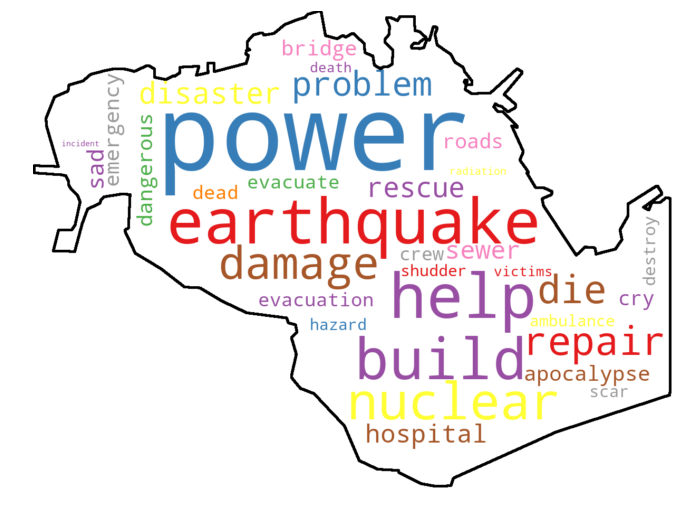

In [142]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotdlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def transform_format(val):
	if val == 0:
		return 255
	else:
		return val

wine_mask = np.array(Image.open("map_white.png"))
 
wordcloud = WordCloud(max_font_size=200, max_words=50, mode='RGB',
	mask=wine_mask,
	colormap=plt.cm.Set1,
                      collocations=False,
	contour_width=8, relative_scaling=.5,
	background_color="white").generate(list_palavras)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

In [ ]:
idx_data = []
loc_data = []
acc_data = []
msg_data = []
for idx, cor in data.iterrows():
    for word in p_usar:
        if word in cor.message:
            idx_data.append(idx)
            loc_data.append(cor.location)
            acc_data.append(cor.account)
            msg_data.append(cor.message)
            break

In [131]:
df_aux = pd.DataFrame(columns=["time","location","account","message"])
df_aux["time"] = idx_data
df_aux["location"] = loc_data
df_aux["account"] = acc_data
df_aux["message"] = msg_data
df_aux = df_aux.set_index("time")

In [132]:
df_aux.shape

(513, 3)

- Histograma con las palabras mas relevantes

In [133]:
edges2, hist2 = histogram(df_aux, "location", 100)

In [141]:
p2 = figure(plot_height=400, plot_width=800, title="Quantidade de tweets por intervalo de tempo",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

p2.xaxis.axis_label = "dias registrados"
p2.yaxis.axis_label = "quantidade de tweets"
source1 = ColumnDataSource(dict(hist=hist2,left=edges2[:-1], right=edges2[1:]))
p2.quad(top="hist", bottom=0, left="left", right="right", color = "blue", 
            line_color="white", alpha=1, source=source1, legend="tweets")
p2.hover.tooltips = [("data inicial", "@left{%F %T}"),
                    ("data final", "@right{%F %T}"),
                    ("quantidade", "@hist")]

p2.hover.formatters = {'left': 'datetime', 'right': 'datetime'}
p2.hover.mode = "vline"
show(p2)

In [ ]:
def normalizar_texto(df, words="", itvlo=False, d_init="", d_end=""):
    t_text = ""
    data_explorer = data.loc[data.location=="Broadview"].message
    for idx in data.message:
        t_text = t_text + " " + idx 

### Gráfico #2

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output, curdoc
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange, HoverTool
from bokeh.models.annotations import Title
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
from bokeh.layouts import row, column,layout, gridplot
from bokeh.models.widgets import Slider, TextInput, RangeSlider, Select, DateRangeSlider
from bokeh.transform import cumsum
from bokeh.palettes import Category10, Category20
import nltk

def histogram(df, col, bins=30):
    edges = []
    hist = []
    largura = max(df.index) - min(df.index)
    h = largura/bins
    aux = min(df.index)
    for i in range(100):
        edges.append(aux)
        hist.append(df.loc[aux:aux + h].count()[col])
        aux = aux + h
    edges.append(aux)
    
    return edges, hist

#Gráfico 1
p1 = figure(plot_height=400, plot_width=800, title="Distribuição dos tweets",
           tools="hover,pan,wheel_zoom,box_zoom,reset,save",x_axis_type='datetime')

#Gŕafico 2
p2 = figure(plot_height=800, plot_width=400, title="Palavras mais faladas", )

In [75]:
data.head()

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"[take, advantheeseage, theesehese, one, theese..."
2020-04-06 00:00:00,Southton,LazyBCouch,"[watchesthomasbird, fork, back, someneomething..."
2020-04-06 00:02:00,Southton,______3333_____,"[two, month, leave, bedoreefore, loose, vibedo..."
2020-04-06 00:04:00,Broadview,RasoHorse49,"[billeeeeer, miss, ytouou]"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,"[obviously, need, use, rumble, rumble, towonder]"


In [76]:
idx_data = []
loc_data = []
acc_data = []
msg_data = []
for idx, cor in data.iterrows():
    for word in p_usar:
        if word in cor.message:
            idx_data.append(idx)
            loc_data.append(cor.location)
            acc_data.append(cor.account)
            msg_data.append(cor.message)
            break

df_aux = pd.DataFrame(columns=["time","location","account","message"])
df_aux["time"] = idx_data
df_aux["location"] = loc_data
df_aux["account"] = acc_data
df_aux["message"] = msg_data
df_aux = df_aux.set_index("time")
print(df_aux.shape)

df_aux.to_csv("./data/data_geral_normalizada.csv")

dp = pd.read_csv("./data/data_geral_normalizada.csv",parse_dates=True, infer_datetime_format=True)
dp = dp.set_index("time")
dp.index = pd.to_datetime(dp.index)
dp.head()

(9935, 3)


,location,account,message
time,,,
2020-04-06 00:00:00,Southton,LazyBCouch,"['watchesthomasbird', 'fork', 'back', 'someneo..."
2020-04-06 00:16:00,Southwest,Grant1953Rapp,"['obviously', 'need', 'get', 'rumble', 'quake']"
2020-04-06 00:21:00,Southwest,Syndicated4,"['one', 'weekend', 'leave', 'loose', 'quake', ..."
2020-04-06 00:30:00,Cheddarford,CantonCoordon2,"['shake', 'new', 'great', 'deal']"
2020-04-06 00:49:00,Terrapin Springs,______3333_____,"['chance', 'clasp', 'opportunity', 'wheel', 'g..."


In [77]:
dp.loc[dp.account=="DerekNolan"].iloc[1].message

"['bet', 'offishuls', 'alwayssafepowercompany', 'dance', 'theyree', 'power', 'palnt', 'watch', 'pal', 'burn']"

In [21]:
"earthqwakes" in p_usar

False